# Problem Definition

Our group intends to investigate the relationship between audio features and popularity of spotify tracks. 

For established artists, they can use this algorithm to assist and guide them in replicating their previously successful hits.

For upcoming or new artists, they can use this algorithm to decide on which audio features they can focus on in order to maximise their likelihood of releasing a hit song.

In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

Description of the dataset, as available on Spotify API Web Interface, is as follows.
Learn more : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


> **Track_ID** : The Spotify ID for the track.

> **Track Name** : Name of track.

> **Artist Name** : Name of artist of track.

> **Popularity** : As offered by spotify, popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

> **Danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.  

> **Energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

> **Key** : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. 
Range: -1 <= Key <= 11.

> **Loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). 
Range: -60dB <= Loudness <= 0dB.

> **Mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

> **Speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
Range: 0 <= speechiness <= 1.

> **Acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
Range: 0 <= acousticness <= 1.

> **Instrumentalness** : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
Range: 0 <= instrumentalness <= 1.

> **Liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
Range: 0 <= liveness <= 1.

> **Tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

> **Duration** : The duration of the track in minutes, rounded to 2 decimal places.  

> **Time Signature** : An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
Range: 3 <= time signature <= 7.

In [2]:
#Importing CSV
database = pd.read_csv('spotify.csv')
database.drop(['Unnamed: 0'], axis=1, inplace = True)
database

track_id                   track_name  \
0      3yfqSUWxFvZELEM4PmlwIR          The Real Slim Shady   
1      3LMpZcOhaz2CUX5rfoCNRs     Anthem for the Year 2000   
2      2MLHyLy5z5l5YRp7momlgw            Island In The Sun   
3      6pM25DLzJb5oWj74d3ElXI        2000 Light Years Away   
4      7D0RhFcb3CrfPuTJ0obrod                       Sparks   
...                       ...                          ...   
19411  2DR9a7bO5PKoVZil3iGsBv    2019 new year Halosui bag   
19412  3eeyKNIBrt5TH4y0y3QkOu                      Hot Now   
19413  4hHj4CxhjyEGnG9aaIXRro  Happy New Year 2019 Special   
19414  18Gcl5bxdd8bpBhWOj1rCR                         HAHA   
19415  3CTTy5zhr19yPUTVRJqo8q    Santa Claus New Year 2019   

                      artist_name  popularity  danceability  energy  key  \
0                          Eminem          91         0.949   0.661    5   
1                     Silverchair          50         0.325   0.768    2   
2                          Weezer          81         0.654   0.810    4   
3                       Green Day          49         0.206   0.990   10   
4                        Coldplay          86         0.371   0.268    1   
...                           ...         ...           ...     ...  ...   
19411                      cocone           0         0.625   0.554   10   
19412  YoungBoy Never Broke Again          68         0.569   0.996    5   
19413                    Neha Raj           0         0.917   0.657    8   
19414                  Lil Darkie          70         0.568   0.787    4   
19415                      Irvina           0         0.421   0.539   11   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0        -4.244     0       0.0572       0.03020          0.000000    0.0454   
1        -7.510     1       0.0491       0.04260          0.000004    0.2700   
2        -6.260     0       0.0288       0.00719          0.002510    0.1650   
3        -3.565     1       0.1300       0.00176          0.000081    0.3350   
4       -10.506     1       0.0281       0.74800          0.051700    0.1040   
...         ...   ...          ...           ...               ...       ...   
19411    -5.531     1       0.0618       0.41700          0.000000    0.3050   
19412    -0.450     1       0.2240       0.19800          0.011400    0.7070   
19413    -5.716     1       0.0921       0.31800          0.000004    0.0754   
19414    -6.765     1       0.0462       0.11600          0.003050    0.5220   
19415    -5.456     0       0.2740       0.77900          0.000000    0.1110   

       valence    tempo  duration  time_signature  
0        0.760  104.504      4.74               4  
1        0.454  176.600      4.13               4  
2        0.661  114.623      3.34               4  
3        0.666  187.433      2.41               4  
4        0.165  102.617      3.78               3  
...        ...      ...       ...             ...  
19411    0.846  111.911      3.55               4  
19412    0.461  100.020      3.36               3  
19413    0.818  131.030      2.76               4  
19414    0.695  108.015      5.14               4  
19415    0.523   89.177      4.69               3  

[19416 rows x 17 columns]

In [3]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19416 entries, 0 to 19415
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          19416 non-null  object 
 1   track_name        19416 non-null  object 
 2   artist_name       19416 non-null  object 
 3   popularity        19416 non-null  int64  
 4   danceability      19416 non-null  float64
 5   energy            19416 non-null  float64
 6   key               19416 non-null  int64  
 7   loudness          19416 non-null  float64
 8   mode              19416 non-null  int64  
 9   speechiness       19416 non-null  float64
 10  acousticness      19416 non-null  float64
 11  instrumentalness  19416 non-null  float64
 12  liveness          19416 non-null  float64
 13  valence           19416 non-null  float64
 14  tempo             19416 non-null  float64
 15  duration          19416 non-null  float64
 16  time_signature    19416 non-null  int64 

# Insights

While the data types for most variables are identified correctly, we believe that the following variables are labelled incorrectly.

**Key**: Although they are given in numerical values ranging from -1 to 11, they are in fact numeric encoding of the different possible musical keys, such as C, C#, D, Db. Hence, we believe this should be a categorical variable.

**Mode**: Although given as numerical values from 0 to 1, it is merely numeric encoding to decided whether the song is played in major scale (1) or minor scale (0). Hence, we believe this should be a categorical variable.

**Time Signature**: Although given as numerical values for 3 to 7, they are numeric encoding for the estimation of beats per bar in the music, e.g. 3/4, 7/4. Hence, we believe this should be a categorical variable.

In [4]:
#Predictor Variables
numeric = pd.DataFrame(database[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']])

#Categorical Variables
categorical = pd.DataFrame(database[['key', 'mode', 'time_signature']])

#All variables
variables = pd.DataFrame(database[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration','key', 'mode', 'time_signature']])

#Response Variable
popularity = pd.DataFrame(database['popularity'])

In [5]:
#Summary Statistics of numeric variables
numeric.describe()

danceability        energy      loudness   speechiness  acousticness  \
count  19416.000000  19416.000000  19416.000000  19416.000000  19416.000000   
mean       0.570222      0.674815     -7.838767      0.090111      0.230815   
std        0.169750      0.233090      4.320179      0.105160      0.297112   
min        0.000000      0.000020    -44.761000      0.000000      0.000000   
25%        0.458000      0.525000     -9.351500      0.036100      0.005130   
50%        0.575000      0.716000     -6.844500      0.049900      0.074900   
75%        0.694000      0.868000     -5.080000      0.090700      0.378000   
max        0.985000      1.000000      1.526000      0.961000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      19416.000000  19416.000000  19416.000000  19416.000000   
mean           0.177834      0.229087      0.490992    122.719028   
std            0.325169      0.201796      0.252063     27.946602   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098300      0.287000    100.253250   
50%            0.000087      0.141000      0.487000    124.893000   
75%            0.124250      0.304000      0.693000    138.056000   
max            1.000000      0.996000      0.998000    220.099000   

           duration  
count  19416.000000  
mean       3.953030  
std        3.010822  
min        0.290000  
25%        3.030000  
50%        3.690000  
75%        4.410000  
max       80.000000

In [6]:
#Summary Statistics of categorical variables
categorical.describe()

key          mode  time_signature
count  19416.000000  19416.000000    19416.000000
mean       5.297384      0.648795        3.929440
std        3.555519      0.477359        0.367445
min        0.000000      0.000000        0.000000
25%        2.000000      0.000000        4.000000
50%        5.000000      1.000000        4.000000
75%        8.000000      1.000000        4.000000
max       11.000000      1.000000        5.000000

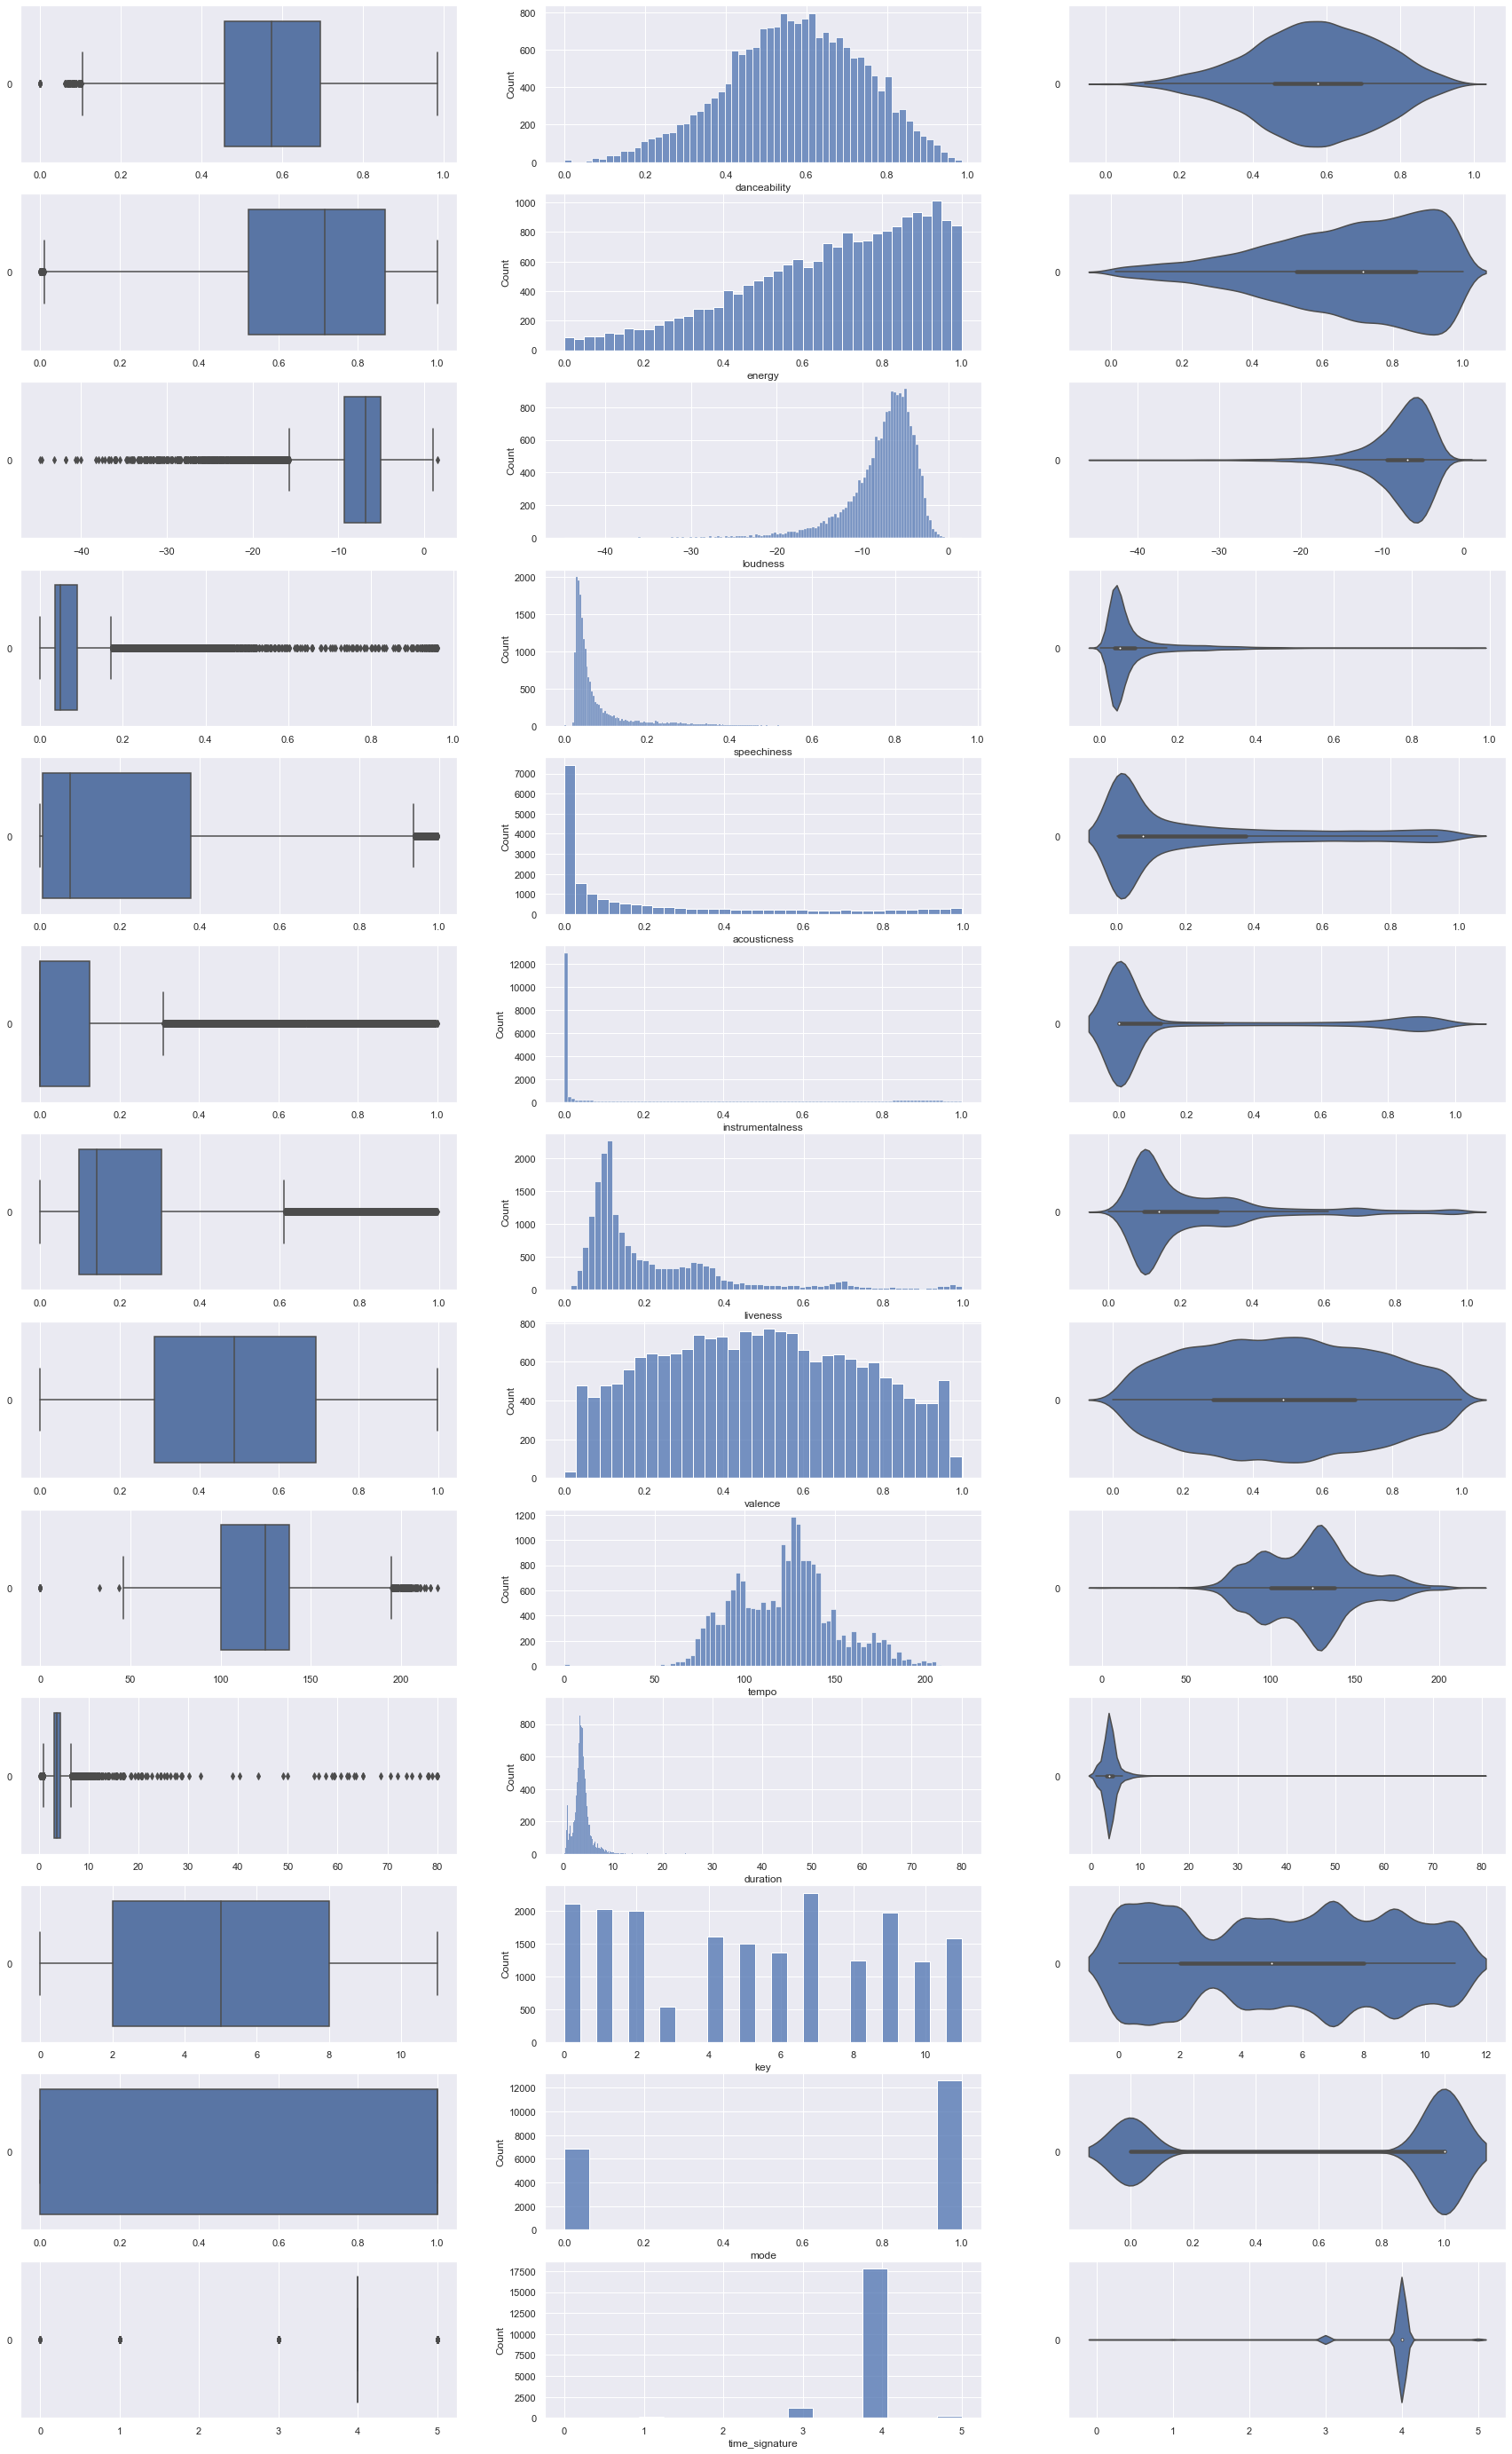

In [7]:
# Draw the distributions of all variables
f, axes = plt.subplots(13, 3, figsize=(30, 50))

count = 0
for var in variables:
    sb.boxplot(data = variables[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = variables[var], ax = axes[count,1])
    sb.violinplot(data = variables[var], orient = "h", ax = axes[count,2])
    count += 1

# Making sense of the Data

## Numeric Variables

### **Danceability**: 
Observing from the values from the 25th percentile to the 75th percentile, which ranges from 0.46 to 0.69, we conclude that most songs are danceable.

### **Energy**: 
Observing from the values from the 25th percentile to the 75th percentile, which ranges from 0.52 to 0.87, we conclude that most songs are full of energy.

### **Loudness**: 
it appears that majority of the songs are considered loud, with values ranging from -9.35 at 25th percentile to -5.08 at 75th precentile. In fact, there are some songs that exceed the limit of the equipment, giving rise to values that are more than 0. 

### **Speechiness**: 
Based on the Spotify documentation, the higher the speechiness value, the higher the presence of spoken words in a track. Since the 25th percentile to the 75th percentile ranges from 0.036 to 0.091, we can safely assume that majority of tracks found on Spotify are actually purely instrumental/electronic.

### **Acousticness**: 
The 25th percentile to the 75th percentile ranges from 0.0051 to 0.38, suggesting that the music industry is shifting away from more traditional music instruments such as violins, guitars or pianos. Instead, they are employing the use of electronically generated music to suit the taste of modern audience.

### **Instrumentalness**: 
Based on the Spotify documentation, the closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Vocal content includes 'oooh' and 'aahhh'. Since the 25th percentile and 75th percentile ranges from 0.00 to 0.12, we conclude most songs have some form of human vocal recording. Taking into account the values of speechiness, we conclude that while most songs have vocals, majority of them are not words, rather these songs are filled with incomprehensible human sounds.

### **Liveness**: 
According to the Spotify documentation, liveness detects the presence of audience in the background of the track. Since the 25th percentile to the 75th percentile ranges from 0.098 to 0.30, we can safely observe that most songs are likely to have no audience in the background of the track. 

### **Valence**: 
According to the Spotify documentation, the higher the valence value, the more the track sounds positive to its listeners. Since the 25th percentile to 75th percentile ranges from 0.29 to 0.69, we can safely observe that most songs have a positive tone. 

### **Tempo**: 
According to the Spotify documentation, the higher the tempo data, the higher the BPM (beats per minute) of a song. Since the 25th percentile to the 75th percentile ranges from 100 to 138, we can observe that today's music are catered towards those with taste for fast-paced music.

### **Duration**:
Most songs have a duration ranging from 3 - 4 minutes. However, it is with the exception of some songs who has a maximum duration of 80 minutes, which is rather notable exception from the rest of the data. After some research, we conclude that these songs tend to have a specific target demographic. Such examples could be meditation songs, piano music which are targeted to make the listeners feel relaxed and rejuvenated. 

## Categorical Variables

### **Key**: 
Looking at the histogram, there is a even distribution across all the different keys, suggesting that there is a wide range of song choices for different target audiences.

### **Mode**: 
Since this is a boolean variable, with higher frequency of 1, this suggests that majority of the songs are written major scales compared to minor scales.

### **Time Signature**: 
Since the modal of the distribution is 4, we conclude that most songs abide by the 4 beats per bar time signature, which reflects what is common within the music industry.


# Correlation between numeric variables and popularity

In [8]:
whole = pd.concat([numeric, popularity], axis = 1).reindex(numeric.index)

In [9]:
whole.corr()

danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.013901  0.193929     0.156512     -0.108915   
energy                0.013901  1.000000  0.698504     0.038001     -0.698474   
loudness              0.193929  0.698504  1.000000    -0.000540     -0.542603   
speechiness           0.156512  0.038001 -0.000540     1.000000      0.010151   
acousticness         -0.108915 -0.698474 -0.542603     0.010151      1.000000   
instrumentalness     -0.162537  0.003948 -0.340744    -0.115238      0.012526   
liveness             -0.194648  0.129055 -0.047466     0.131893     -0.001342   
valence               0.408744  0.266757  0.263539     0.029503     -0.123995   
tempo                -0.118896  0.204440  0.137966     0.011125     -0.173850   
duration             -0.034139 -0.034547 -0.045617    -0.009404     -0.007660   
popularity            0.060811 -0.004395  0.062788     0.027898     -0.032472   

                  instrumentalness  liveness   valence     tempo  duration  \
danceability             -0.162537 -0.194648  0.408744 -0.118896 -0.034139   
energy                    0.003948  0.129055  0.266757  0.204440 -0.034547   
loudness                 -0.340744 -0.047466  0.263539  0.137966 -0.045617   
speechiness              -0.115238  0.131893  0.029503  0.011125 -0.009404   
acousticness              0.012526 -0.001342 -0.123995 -0.173850 -0.007660   
instrumentalness          1.000000  0.058203 -0.194332  0.020461  0.059478   
liveness                  0.058203  1.000000 -0.050056 -0.019033  0.018958   
valence                  -0.194332 -0.050056  1.000000  0.046351 -0.137695   
tempo                     0.020461 -0.019033  0.046351  1.000000 -0.011793   
duration                  0.059478  0.018958 -0.137695 -0.011793  1.000000   
popularity               -0.057308 -0.035953 -0.006784  0.004096 -0.002915   

                  popularity  
danceability        0.060811  
energy             -0.004395  
loudness            0.062788  
speechiness         0.027898  
acousticness       -0.032472  
instrumentalness   -0.057308  
liveness           -0.035953  
valence            -0.006784  
tempo               0.004096  
duration           -0.002915  
popularity          1.000000

<AxesSubplot:>

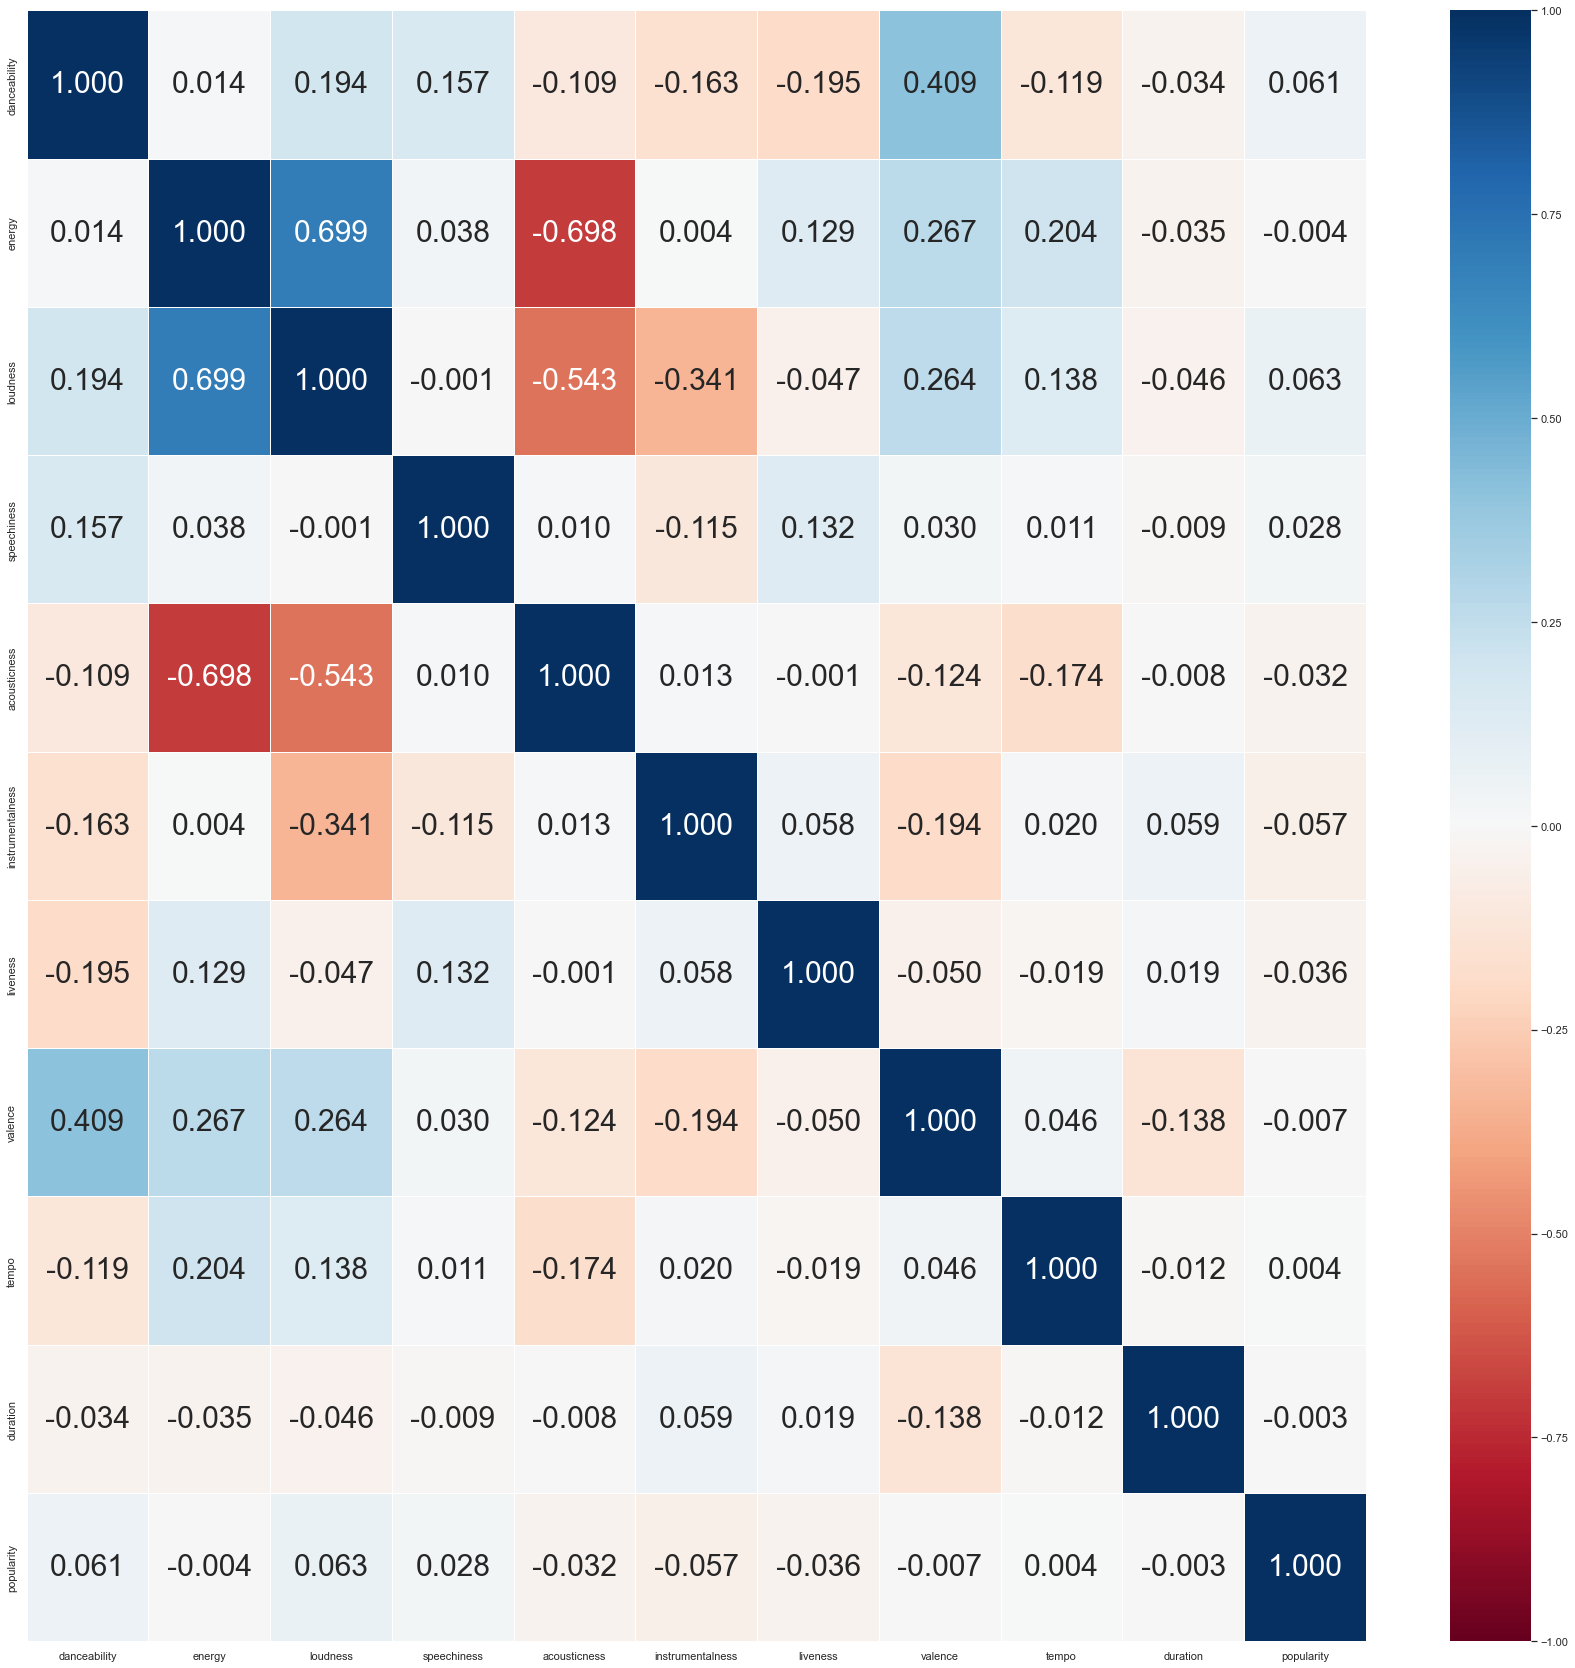

In [10]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(30, 30))
sb.heatmap(whole.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".3f", annot_kws = {"size": 30}, cmap = "RdBu")

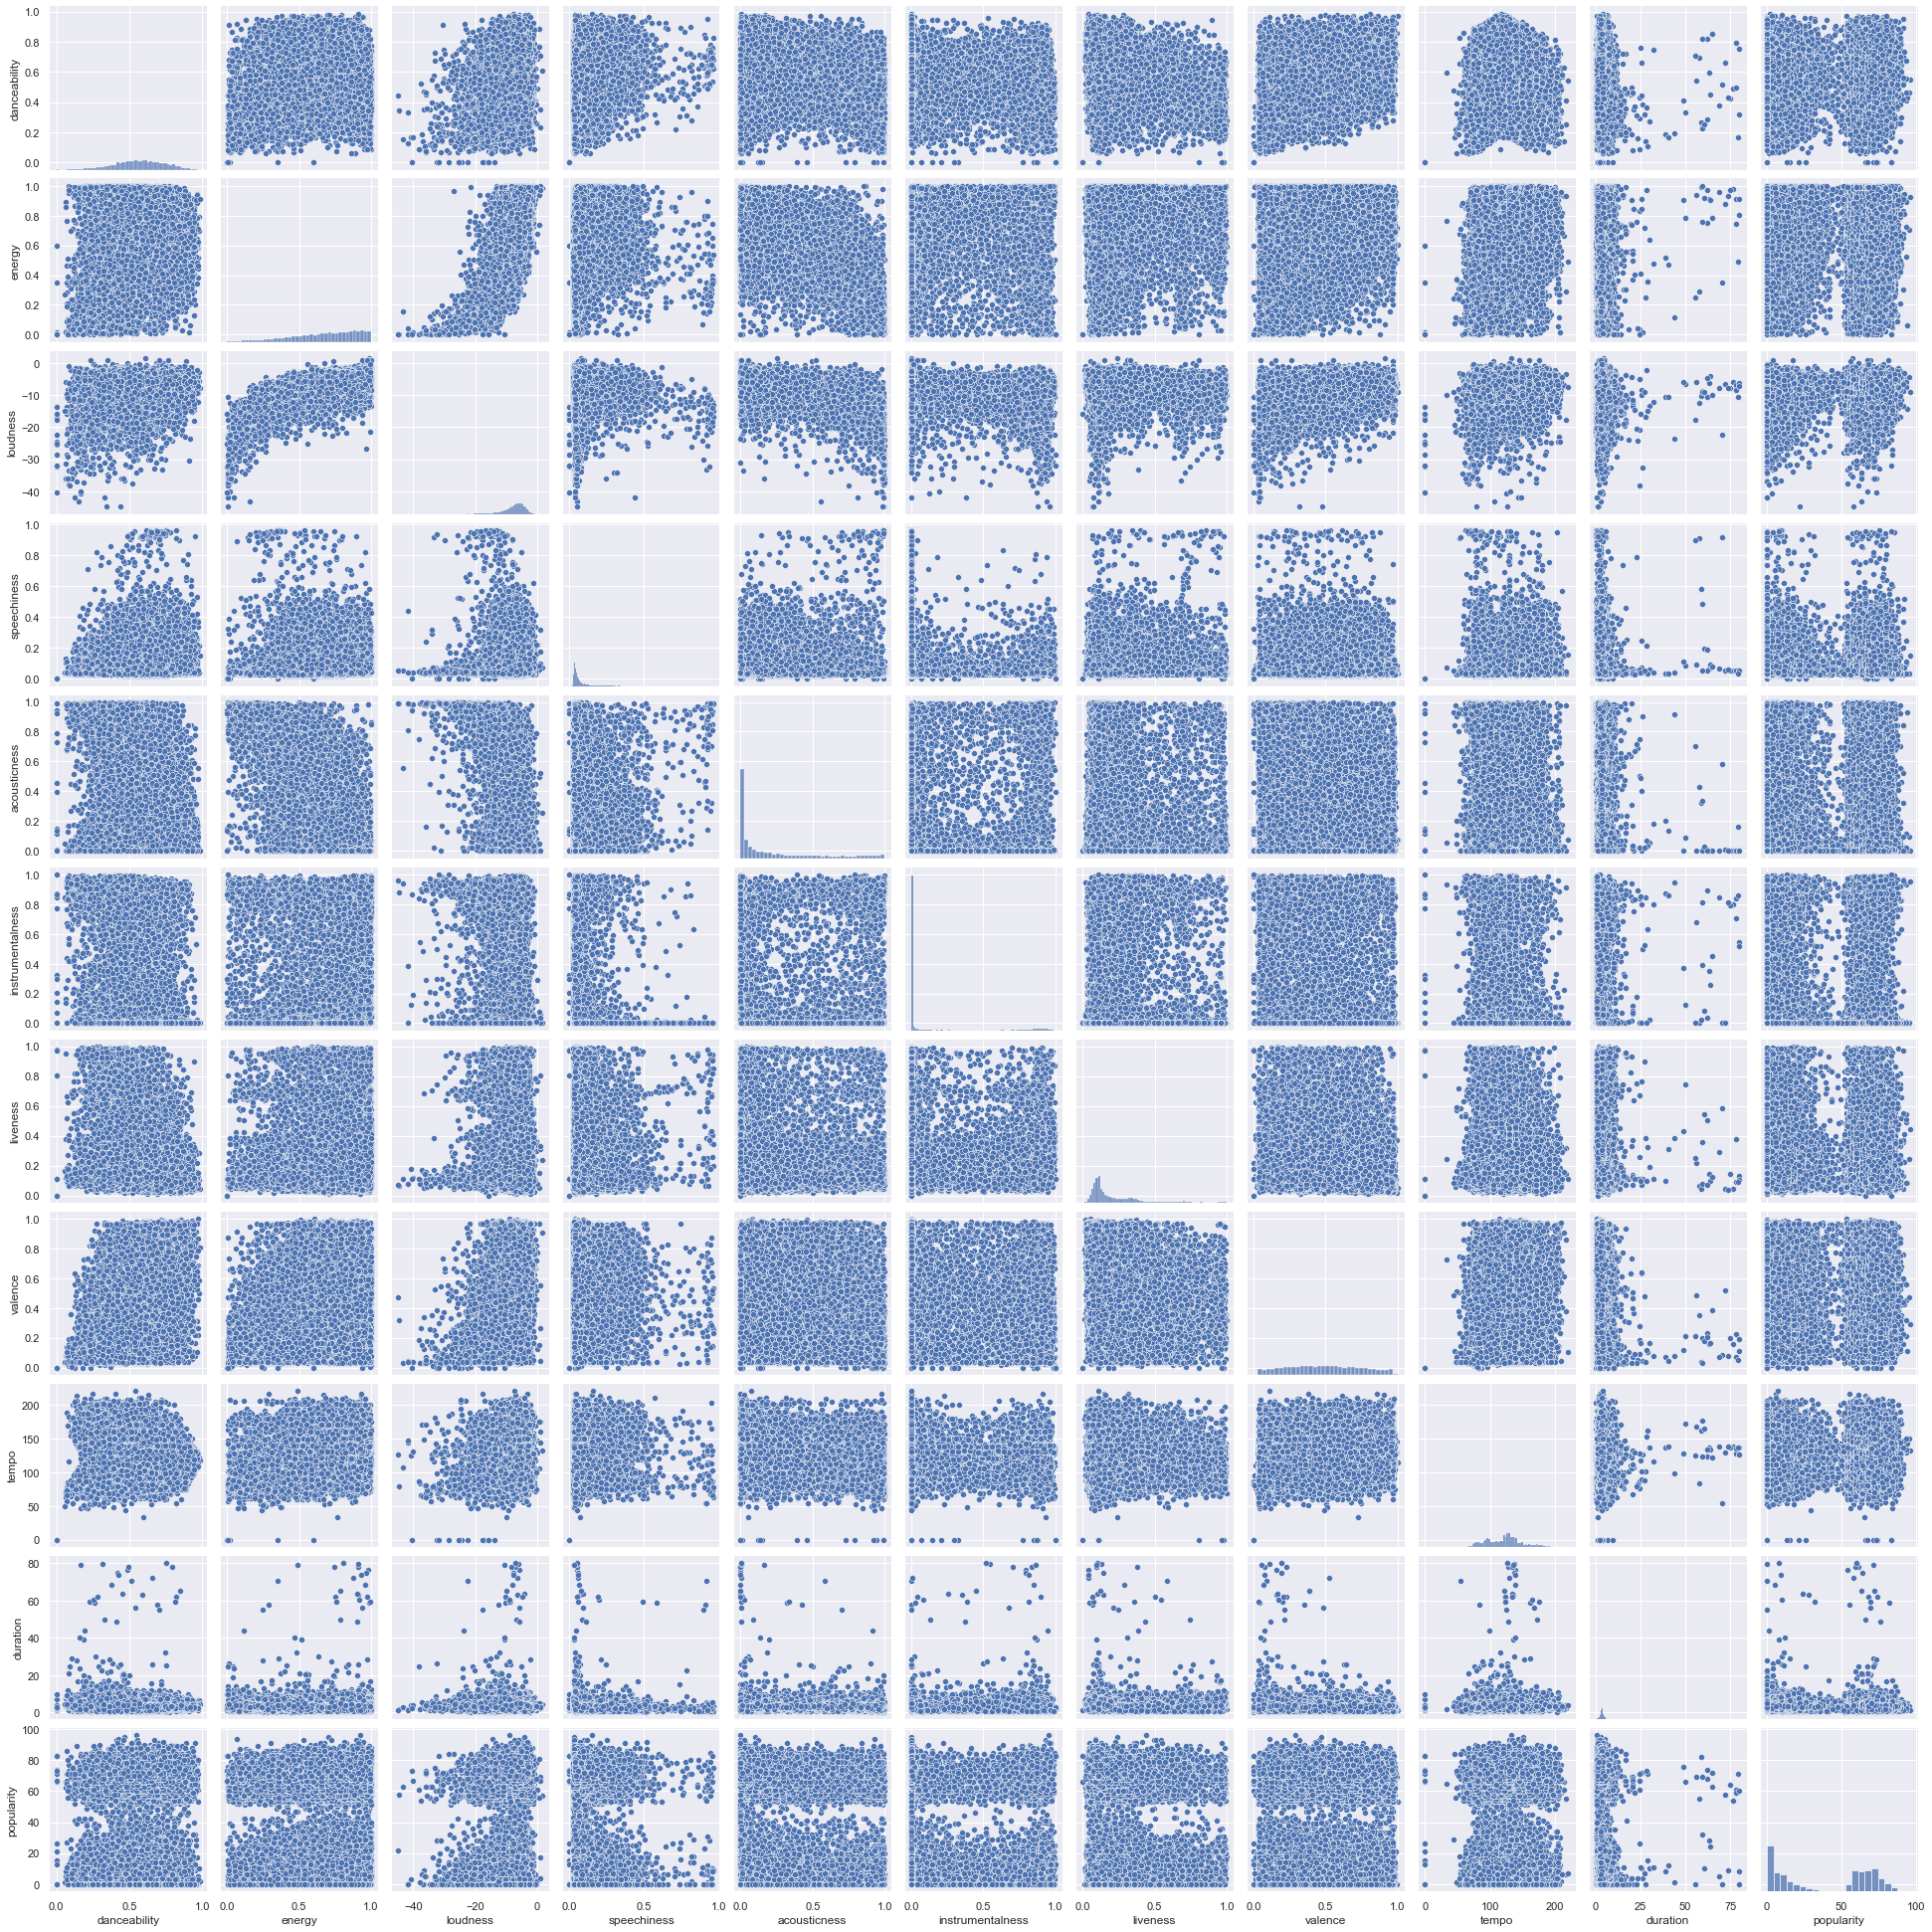

In [11]:
sb.pairplot(data = whole)

# Effect of categorical variables on popularity

We will check the distribution of popularity across different categories of 'key', 'mode' and 'time_signature'

In [12]:
CatData = pd.concat([categorical, popularity], axis=1).reindex(categorical.index)
CatData.head()

key  mode  time_signature  popularity
0    5     0               4          91
1    2     1               4          50
2    4     0               4          81
3   10     1               4          49
4    1     1               3          86

<AxesSubplot:xlabel='key', ylabel='popularity'>

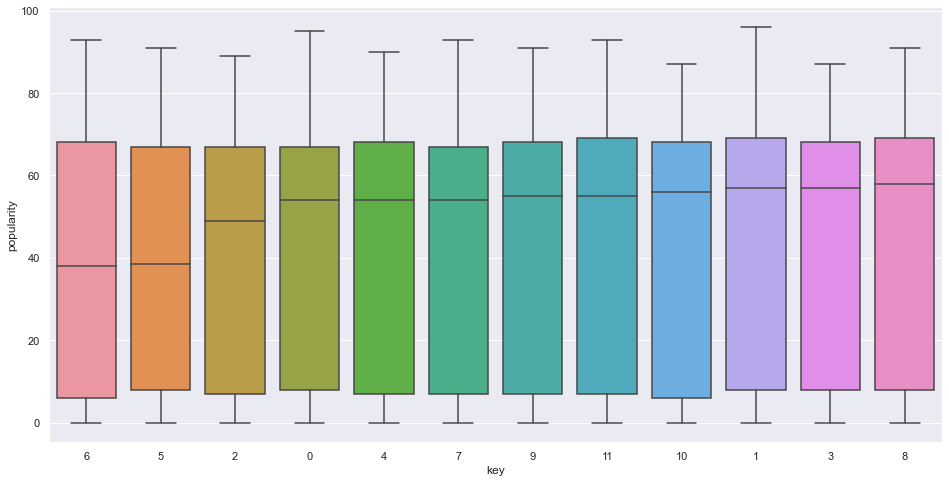

In [13]:
#Box plots of key against popularity
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'key', y = 'popularity', data = CatData, 
           order = CatData.groupby('key')['popularity'].median().sort_values().index)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

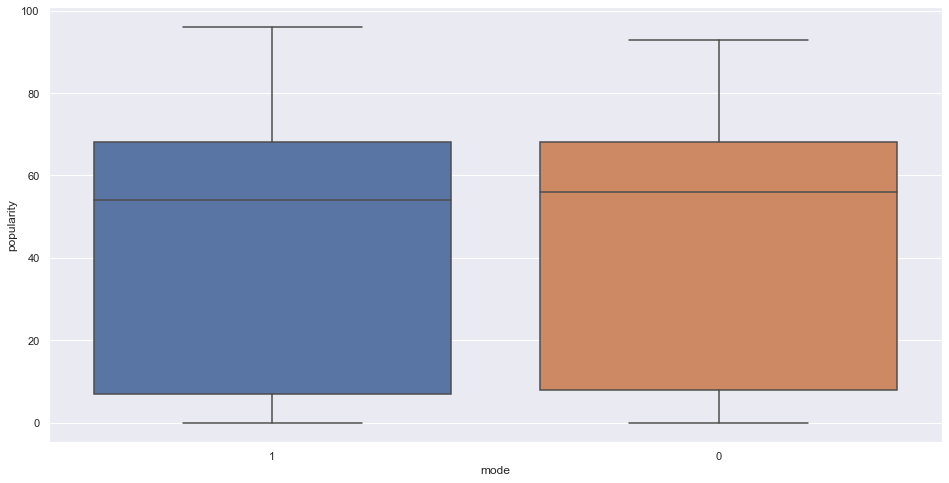

In [14]:
#Box plots of mode against popularity
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mode', y = 'popularity', data = CatData, 
           order = CatData.groupby('mode')['popularity'].median().sort_values().index)

<AxesSubplot:xlabel='time_signature', ylabel='popularity'>

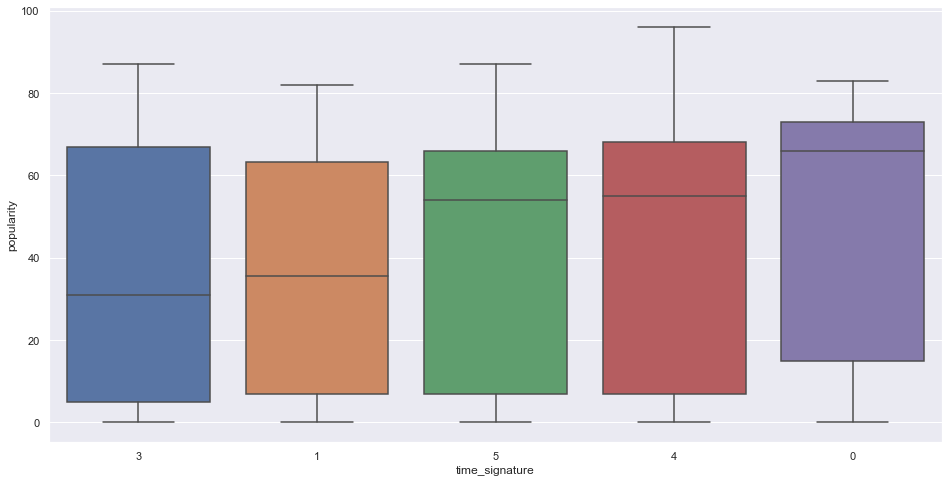

In [15]:
#Box plots of time signature against popularity
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'time_signature', y = 'popularity', data = CatData, 
           order = CatData.groupby('time_signature')['popularity'].median().sort_values().index)

# Insights

#### Numeric
Upon analysis of the correlation matrix, it has become fairly evident that none of the numeric variables have a strong linear relationship with popularity. The correlations of each numeric variable with popularity is listed below:

Danceability: 0.060811 <br />
Energy: -0.004395 <br />
Loudness: 0.062788<br />
Speechiness: 0.027898<br />
Acousticness: -0.032472<br />
Instrumentalness: -0.057308<br />
Liveness: -0.035953<br />
Valence: -0.006784<br />
Tempo: 0.004096<br />
Duration(min): -0.002915<br />

											

#### Categorical

key: Not much variation in boxplots across levels except key 6, which corresponds to F#/Gb in the musical scale. <br />
mode: Not much variation in boxplots across levels <br />
time_signature: Slightly more variation across levels as time_signature of 4 and 5 have higher medians.<br />

These results were not expected, but reasonable. As Spotify determines popularity based on the total number of plays the track has had and how recent those plays are, it appears audio features do not have much impact on the song's possible popularity.

# BUT WAIT

Despite the rather disappointing results, we do intend to further explore the data using machine learning. <br />

However, we will be doing some data cleaning through the removal of outliers to hopefully produce better models.

# Removal of Outliers using Isolation Forest (NEW)
 
We decided to use Isolation Forest as it is an unsupervised learning algorithm that can isolate outiers from a multi-dimensional dataset effectively.

Isolation Forests were built based on the fact that anomalies are the data points that are “few and different”.

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

The parameter that we are tuning for Isolation Forest is the contamination rate, which is defined as the percentage of data that we would like to label as outliers.

For the contamination paramter under Isolation Forest, we decided to stick with 0.05 because it yields the most optimal data after mulitple attempts of tuning the contamination paramter

In [16]:
from sklearn.ensemble import IsolationForest

iForest = IsolationForest(n_estimators = 100, contamination = 0.05)

# fit model
iForest.fit(variables)

# predict on data
anomaly_mask = iForest.predict(variables) #anomalies will be masked as -1 in the array
print("number of anomalies identified:",anomaly_mask.tolist().count(-1)) #number of anomalies marked

temp = pd.concat([variables, popularity],axis=1).reindex(variables.index)

temp_wo = temp[(anomaly_mask != -1)].reset_index(drop=True)
print("new shape:",temp_wo.shape) # check the shape

number of anomalies identified: 971
new shape: (18445, 14)


In [17]:
#Update variables without outliers

variables = pd.DataFrame(temp_wo[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration', 'key', 'mode', 'time_signature']])

#Predictor Variables
numeric = pd.DataFrame(temp_wo[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']])

#Categorical Variables
categorical = pd.DataFrame(temp_wo[['key', 'mode', 'time_signature']])

#Response Variable
popularity = pd.DataFrame(temp_wo['popularity'])

# Regression Machine Learning 

### Note: For all our models, we will set random_state=42 to get the same train_test split.

We intend to conduct multivariate linear regression to explore the relationship between audio features and popularity.

We shall do it in **Four** levels:

**First Model**: Using numeric predictor variables with absolute correlation value >= 0.01.

**Second Model**: Using all numeric predictor variables

**Third Model**: Using all categorical predictor variables

**Fourth Model**: Using all(numeric and categorical) variables

# Model 1: LinReg with top 6 numeric variables

We decided to include 6 variables that have the highest correlation in our dataset i.e. 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'.

In [18]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [39.38210676]
Coefficients of Regression 	: a =  [[ 8.25217557  0.41832621  3.71674647 -0.49683615 -3.57253545 -5.5932151 ]]

         Predictors  Coefficients
0      danceability      8.252176
1          loudness      0.418326
2       speechiness      3.716746
3      acousticness     -0.496836
4  instrumentalness     -3.572535
5          liveness     -5.593215



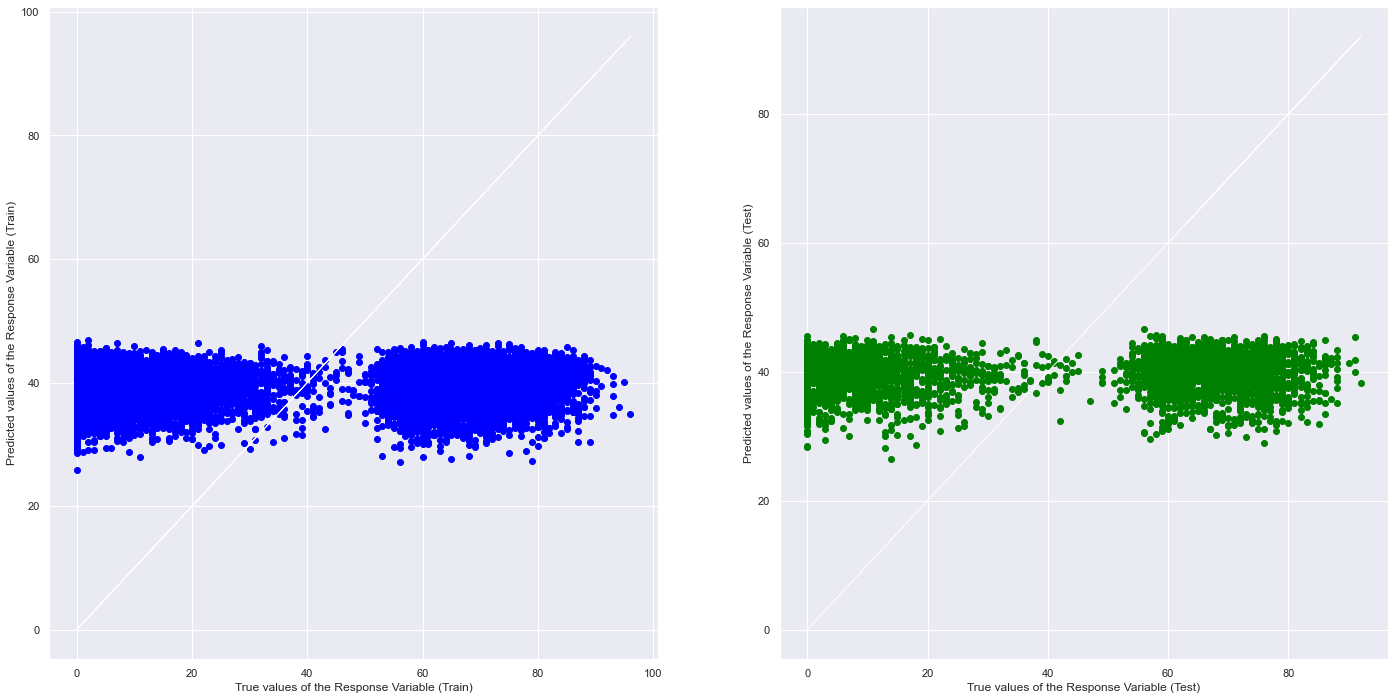

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.00890941434677417
Mean Squared Error (MSE) 	: 930.8169774377343

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.007092094933129012
Mean Squared Error (MSE) 	: 931.3923985052814



In [19]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(variables, popularity, test_size = 0.2, random_state=42)

x_train1 = x_train[['danceability', 'loudness','speechiness','acousticness','instrumentalness','liveness']]
x_test1 = x_test[['danceability', 'loudness','speechiness','acousticness','instrumentalness','liveness']]

# Linear Regression using Train Data
linreg = LinearRegression()        
linreg.fit(x_train1, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train1.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train1)
y_test_pred = linreg.predict(x_test1)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train1, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test1, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 2: LinReg with all numeric variables

Intercept of Regression 	: b =  [52.34193355]
Coefficients of Regression 	: a =  [[ 9.55328827e+00 -1.29785693e+01  9.06005759e-01  4.05692026e+00
  -4.37247789e+00 -1.95240971e+00 -3.46265226e+00 -4.82470157e+00
   1.21033289e-02 -4.33960669e-02]]

         Predictors  Coefficients
0      danceability      9.553288
1            energy    -12.978569
2          loudness      0.906006
3       speechiness      4.056920
4      acousticness     -4.372478
5  instrumentalness     -1.952410
6          liveness     -3.462652
7           valence     -4.824702
8             tempo      0.012103
9          duration     -0.043396



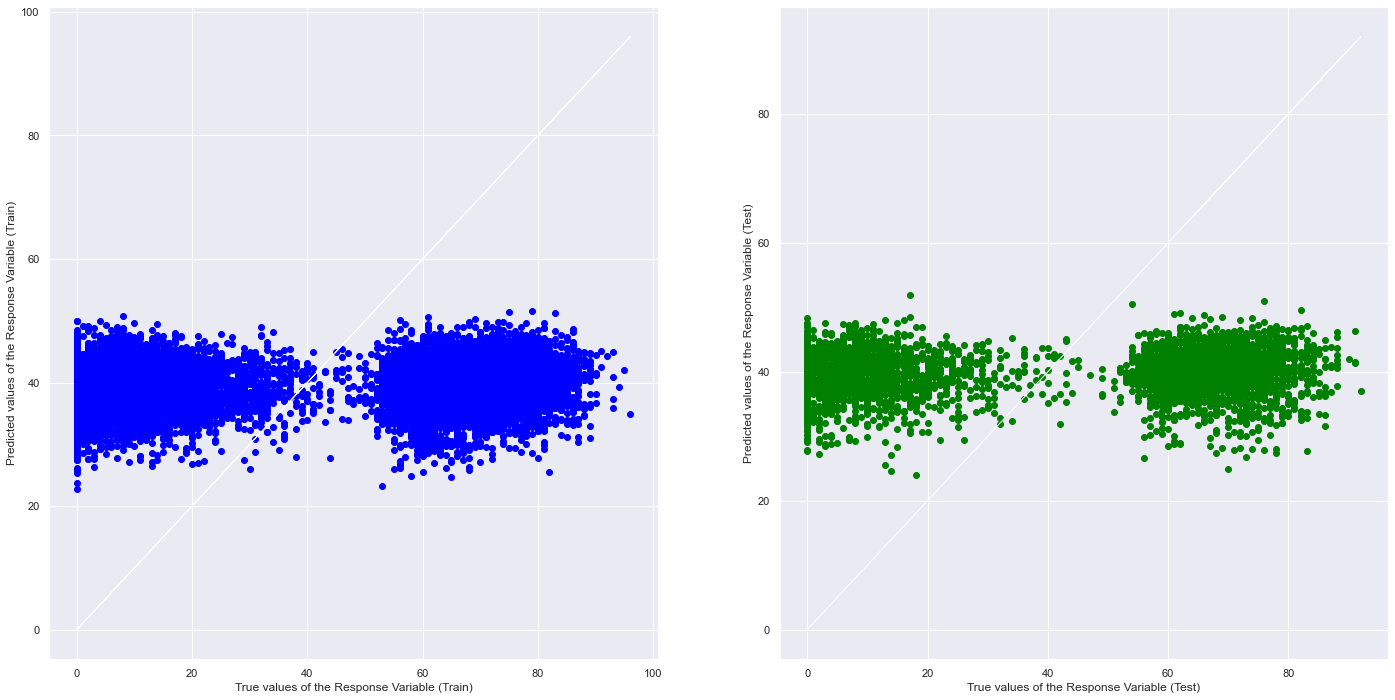

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01395936665148767
Mean Squared Error (MSE) 	: 926.074140195082

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.013783324417184883
Mean Squared Error (MSE) 	: 925.1157234518339



In [20]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(variables, popularity, test_size = 0.2, random_state=42)

x_train2 = x_train[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']]
x_test2 = x_test[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']]

# Linear Regression using Train Data
linreg = LinearRegression()        
linreg.fit(x_train2, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train2.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train2)
y_test_pred = linreg.predict(x_test2)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train2, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test2, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 3: LinReg with all categorical variables


Intercept of Regression 	: b =  [36.38998301]
Coefficients of Regression 	: a =  [[-0.04329853 -1.36462829  1.0749365 ]]

       Predictors  Coefficients
0             key     -0.043299
1            mode     -1.364628
2  time_signature      1.074936



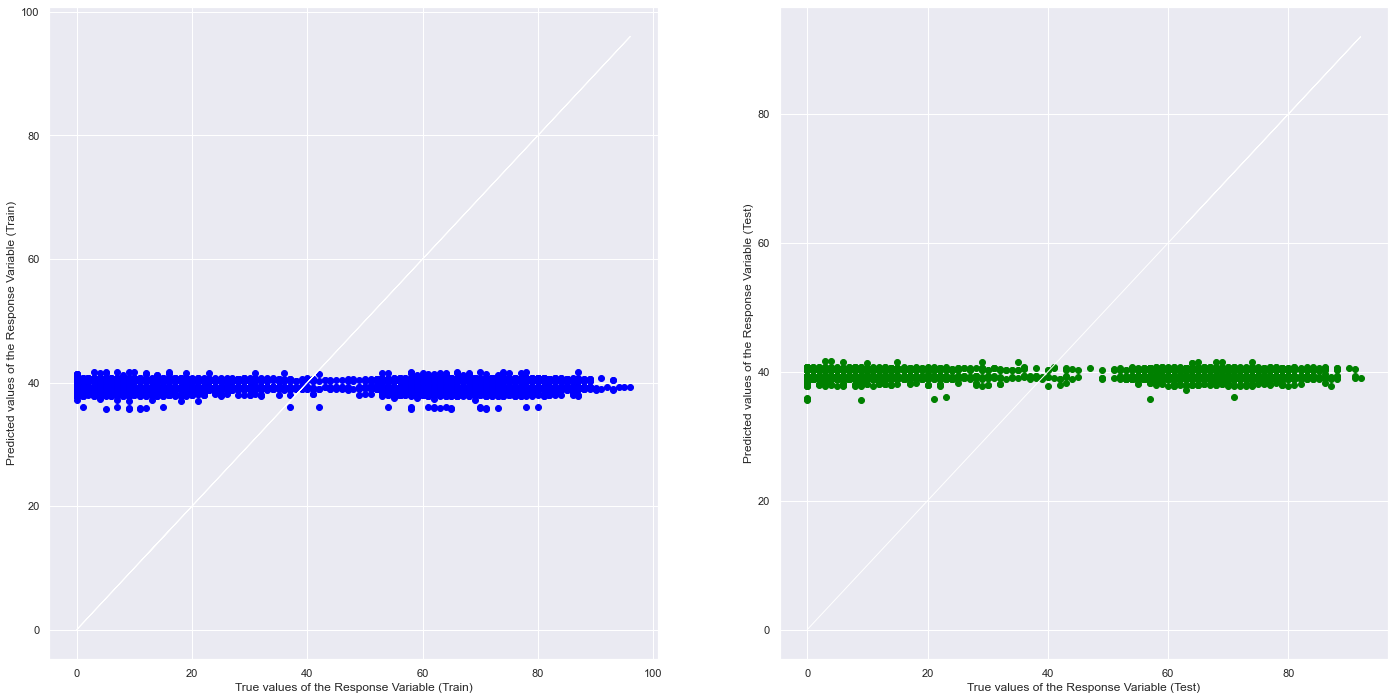

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0005557844880001994
Mean Squared Error (MSE) 	: 938.6625776364816

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.00040441568143712026
Mean Squared Error (MSE) 	: 938.424463580089



In [21]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(variables, popularity, test_size = 0.2, random_state=42)

x_train3 = x_train[['key', 'mode', 'time_signature']]
x_test3 = x_test[['key', 'mode', 'time_signature']]

# Linear Regression using Train Data
linreg = LinearRegression()        
linreg.fit(x_train3, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train3.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train3)
y_test_pred = linreg.predict(x_test3)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train3, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test3, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 4: LinReg with all variables (numeric and categorical)

Intercept of Regression 	: b =  [48.97930669]
Coefficients of Regression 	: a =  [[ 9.08898661e+00 -1.34033515e+01  9.12200541e-01  3.50847462e+00
  -4.20949751e+00 -2.02922945e+00 -3.46424646e+00 -4.71314663e+00
   1.30003558e-02 -4.93281906e-02 -6.95584146e-03 -1.05712173e+00
   1.15802931e+00]]

          Predictors  Coefficients
0       danceability      9.088987
1             energy    -13.403351
2           loudness      0.912201
3        speechiness      3.508475
4       acousticness     -4.209498
5   instrumentalness     -2.029229
6           liveness     -3.464246
7            valence     -4.713147
8              tempo      0.013000
9           duration     -0.049328
10               key     -0.006956
11              mode     -1.057122
12    time_signature      1.158029



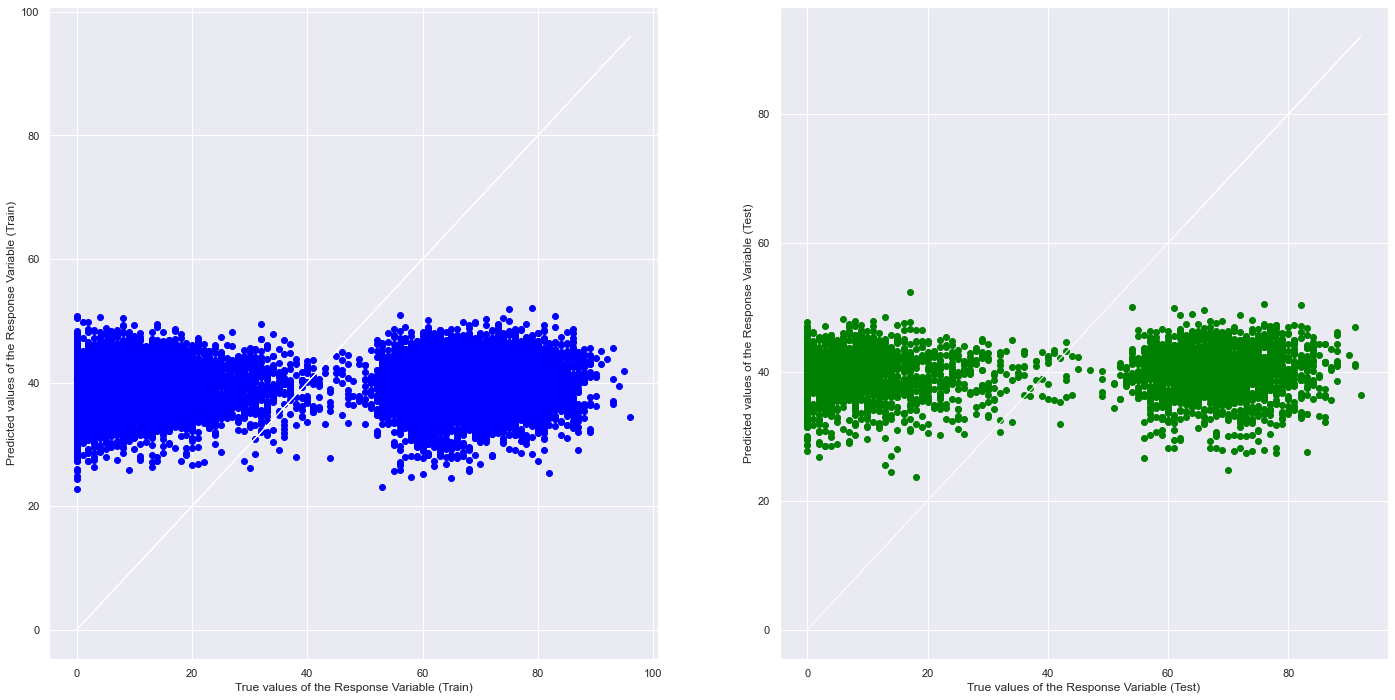

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.014332770138969608
Mean Squared Error (MSE) 	: 925.723445404299

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.01399542743860649
Mean Squared Error (MSE) 	: 924.9167612511666



In [22]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(variables, popularity, test_size = 0.2, random_state=42)

# Linear Regression using Train Data
linreg = LinearRegression()        
linreg.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Analysis of Multi-Variate Linear Regression Model 

From the above observation, the performance of models are as follows, from best to worst: Model 4 = Model 2, Model 1, Model 3.

We deduce that since all variables do not exhibit strong correlation with the popularity variable, the usage of more variables during linear regression would give a more accurate prediction. 

It is interesting to note that the difference in explained variance for model 4 and model 2 is negligible, suggesting that the consideration of categorical variables in the prediction of popularity is inconsequential in linear regression.

# Classification Machine Learning Model

### Now, we will explore if classification is a better model for our dataset.
### First, we convert popularity to a categorical variable.

In [18]:
popularity.describe()

popularity
count  18446.000000
mean      39.652228
std       30.646834
min        0.000000
25%        7.000000
50%       55.000000
75%       68.000000
max       96.000000

<AxesSubplot:>

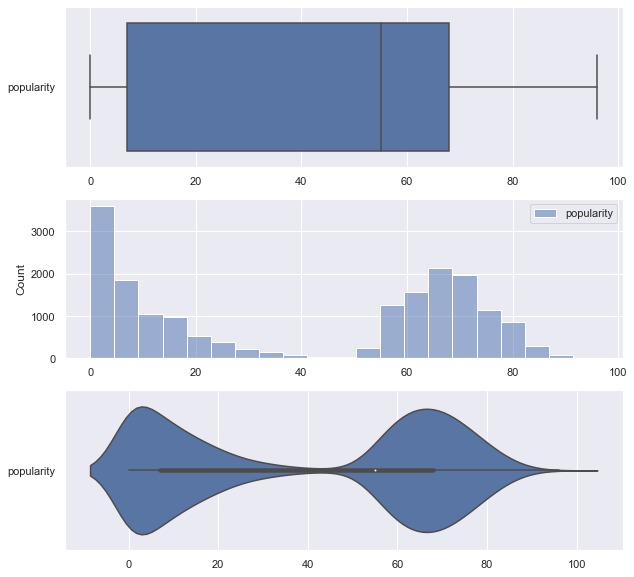

In [19]:
# Draw the distributions of popularity
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = popularity, orient = "h", ax = axes[0])
sb.histplot(data = popularity, ax = axes[1])
sb.violinplot(data = popularity, orient = "h", ax = axes[2])

# Moving Forward
Given the bimodal distribution of popularity, our group decided that to classify it into two classes.<br /> 
True: Popularity >= 50<br />
False: Popularity < 50

As seen from the code below, frequency between popular and non-popular songs are relatively same. There is no class imbalance.

In [20]:
popularity_cat = pd.DataFrame(popularity >= 50)
popularity_cat

popularity
0            True
1            True
2            True
3           False
4            True
...           ...
18441        True
18442       False
18443        True
18444       False
18445        True

[18446 rows x 1 columns]

In [21]:
popularity_cat.describe()

popularity
count       18446
unique          2
top          True
freq         9569

# Classification: Decision Trees

# One Hot Encoding of categorical variables

Since `DecisionTreeClassifier` in `sklearn` does not handle categorical variables directly as a part of the current implementation. Thus, we will need to encode the levels of a categorical variable as integers. However, as the categorical variables may not be *ordinal*, we could not enforce an order with integer encoding. We decided to encode nominal (unordered) categorical variables by integers via `OneHotEncoding`

In [22]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
categorical_cat = categorical
ohe.fit(categorical_cat)
categorical_ohe = pd.DataFrame(ohe.transform(categorical_cat).toarray(), 
                                  columns=ohe.get_feature_names(categorical_cat.columns))

# Check the encoded variables
categorical_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18446 entries, 0 to 18445
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key_0             18446 non-null  float64
 1   key_1             18446 non-null  float64
 2   key_2             18446 non-null  float64
 3   key_3             18446 non-null  float64
 4   key_4             18446 non-null  float64
 5   key_5             18446 non-null  float64
 6   key_6             18446 non-null  float64
 7   key_7             18446 non-null  float64
 8   key_8             18446 non-null  float64
 9   key_9             18446 non-null  float64
 10  key_10            18446 non-null  float64
 11  key_11            18446 non-null  float64
 12  mode_0            18446 non-null  float64
 13  mode_1            18446 non-null  float64
 14  time_signature_1  18446 non-null  float64
 15  time_signature_3  18446 non-null  float64
 16  time_signature_4  18446 non-null  float6

In [23]:
categorical_ohe

key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0        0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18441    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
18442    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18443    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
18444    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18445    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

       key_10  key_11  mode_0  mode_1  time_signature_1  time_signature_3  \
0         0.0     0.0     1.0     0.0               0.0               0.0   
1         0.0     0.0     0.0     1.0               0.0               0.0   
2         0.0     0.0     1.0     0.0               0.0               0.0   
3         1.0     0.0     0.0     1.0               0.0               0.0   
4         0.0     0.0     0.0     1.0               0.0               1.0   
...       ...     ...     ...     ...               ...               ...   
18441     0.0     0.0     0.0     1.0               0.0               0.0   
18442     1.0     0.0     0.0     1.0               0.0               0.0   
18443     0.0     0.0     0.0     1.0               0.0               1.0   
18444     0.0     0.0     0.0     1.0               0.0               0.0   
18445     0.0     0.0     0.0     1.0               0.0               0.0   

       time_signature_4  time_signature_5  
0                   1.0               0.0  
1                   1.0               0.0  
2                   1.0               0.0  
3                   1.0               0.0  
4                   0.0               0.0  
...                 ...               ...  
18441               1.0               0.0  
18442               1.0               0.0  
18443               0.0               0.0  
18444               1.0               0.0  
18445               1.0               0.0  

[18446 rows x 18 columns]

In [24]:
# Combining Numeric features with the OHE Categorical features
ForestData_ohe = pd.concat([numeric, categorical_ohe, popularity_cat], 
                           sort = False, axis = 1).reindex(index=numeric.index)

# Check the final dataframe
ForestData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18446 entries, 0 to 18445
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      18446 non-null  float64
 1   energy            18446 non-null  float64
 2   loudness          18446 non-null  float64
 3   speechiness       18446 non-null  float64
 4   acousticness      18446 non-null  float64
 5   instrumentalness  18446 non-null  float64
 6   liveness          18446 non-null  float64
 7   valence           18446 non-null  float64
 8   tempo             18446 non-null  float64
 9   duration          18446 non-null  float64
 10  key_0             18446 non-null  float64
 11  key_1             18446 non-null  float64
 12  key_2             18446 non-null  float64
 13  key_3             18446 non-null  float64
 14  key_4             18446 non-null  float64
 15  key_5             18446 non-null  float64
 16  key_6             18446 non-null  float6

# Model 5: A Single Decision Tree

In [25]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [26]:
#Response Variable
y = pd.DataFrame(ForestData_ohe['popularity'])

#Predictor variables
x = pd.DataFrame(ForestData_ohe.drop('popularity', axis = 1))

[Text(699.7868852459017, 1195.92, 'instrumentalness <= 0.002\ngini = 0.499\nsamples = 14756\nvalue = [7125, 7631]\nclass = Popular'),
 Text(351.2655737704918, 978.48, 'duration <= 2.675\ngini = 0.495\nsamples = 9224\nvalue = [4145, 5079]\nclass = Popular'),
 Text(175.6327868852459, 761.0400000000001, 'danceability <= 0.538\ngini = 0.497\nsamples = 981\nvalue = [526, 455]\nclass = Unpopular'),
 Text(87.81639344262295, 543.6, 'tempo <= 136.262\ngini = 0.474\nsamples = 391\nvalue = [240, 151]\nclass = Unpopular'),
 Text(43.90819672131148, 326.15999999999997, 'liveness <= 0.462\ngini = 0.491\nsamples = 256\nvalue = [145, 111]\nclass = Unpopular'),
 Text(21.95409836065574, 108.72000000000003, 'gini = 0.499\nsamples = 199\nvalue = [103, 96]\nclass = Unpopular'),
 Text(65.86229508196722, 108.72000000000003, 'gini = 0.388\nsamples = 57\nvalue = [42, 15]\nclass = Unpopular'),
 Text(131.72459016393444, 326.15999999999997, 'time_signature_4 <= 0.5\ngini = 0.417\nsamples = 135\nvalue = [95, 40]\nc

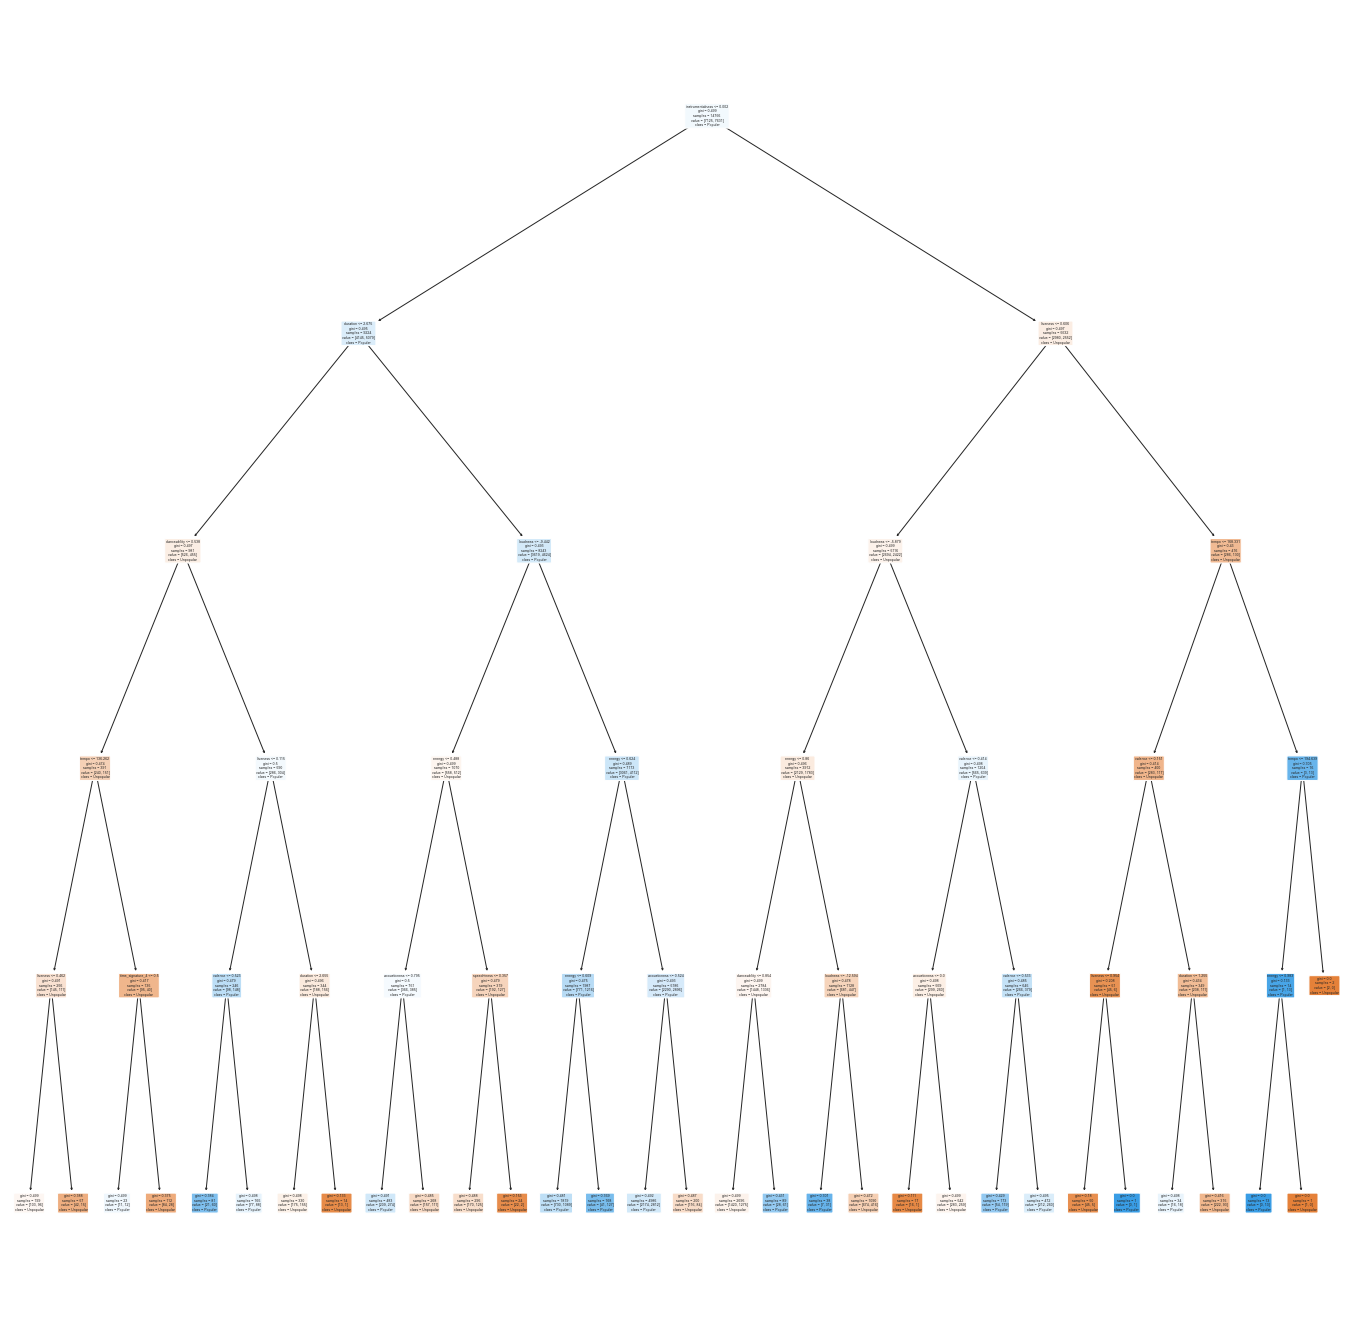

In [27]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  
dectree.fit(x_train, y_train)                    # train the decision tree model


# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["Unpopular", "Popular"])

Train Data
Accuracy  :	 0.5767145567904581

TPR Train :	 0.6506355654566898
TNR Train :	 0.4975438596491228

FPR Train :	 0.5024561403508772
FNR Train :	 0.3493644345433102


<AxesSubplot:>

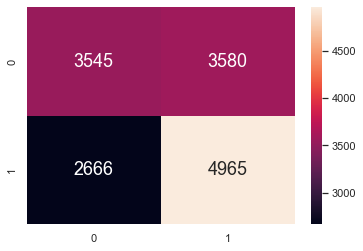

In [28]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5436314363143632

TPR Test :	 0.631062951496388
TNR Test :	 0.4469178082191781

FPR Test :	 0.553082191780822
FNR Test :	 0.368937048503612


<AxesSubplot:>

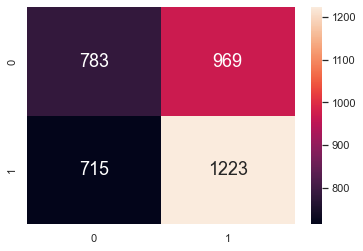

In [29]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Model 6: Random Forest (unoptimised)

In [49]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.popularity.ravel())

RandomForestClassifier(max_depth=5)

Train Data
Accuracy  :	 0.5984006505828138

TPR Train :	 0.7282138645000655
TNR Train :	 0.4593684210526316

FPR Train :	 0.5406315789473685
FNR Train :	 0.27178613549993447


<AxesSubplot:>

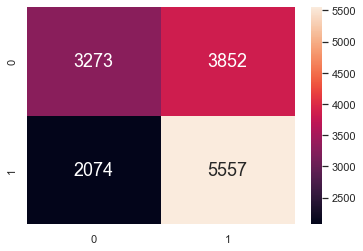

In [50]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5525745257452574

TPR Test :	 0.6904024767801857
TNR Test :	 0.4001141552511416

FPR Test :	 0.5998858447488584
FNR Test :	 0.30959752321981426


<AxesSubplot:>

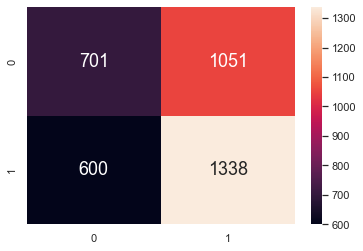

In [51]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Analysis
Random forest leverages the power of multiple decision trees. It does not rely on the feature importance given by a single decision tree. As you can clearly observed from the accuracy reported, the decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features. Therefore, the random forest can generalize over the data in a better way. This randomized feature selection makes random forest much more accurate than a decision tree.

We can see that the classification accuracy, TPR and TNR slightly improved by using Random Forest. Now, we will optimise the performance by tuning the hyperparameters. 

# Model 7: Random Forest with optimised hyperparameters

# Tuning Hyper-parameters (GridSearch with Cross Validation)

In [165]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(4, 11)}             # depth of trees 4-10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'roc_auc', verbose =10)       # score to evaluate

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Train the models using Cross-Validation
hpGrid.fit(x_train, y_train.popularity.ravel())

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5; 1/70] START max_depth=4, n_estimators=100..............................
[CV 1/5; 1/70] END max_depth=4, n_estimators=100;, score=0.568 total time=   0.5s
[CV 2/5; 1/70] START max_depth=4, n_estimators=100..............................
[CV 2/5; 1/70] END max_depth=4, n_estimators=100;, score=0.561 total time=   0.5s
[CV 3/5; 1/70] START max_depth=4, n_estimators=100..............................
[CV 3/5; 1/70] END max_depth=4, n_estimators=100;, score=0.573 total time=   0.5s
[CV 4/5; 1/70] START max_depth=4, n_estimators=100..............................
[CV 4/5; 1/70] END max_depth=4, n_estimators=100;, score=0.571 total time=   0.5s
[CV 5/5; 1/70] START max_depth=4, n_estimators=100..............................
[CV 5/5; 1/70] END max_depth=4, n_estimators=100;, score=0.567 total time=   0.5s
[CV 1/5; 2/70] START max_depth=4, n_estimators=200..............................
[CV 1/5; 2/70] END max_depth=4, n_estimato

[CV 1/5; 11/70] END max_depth=5, n_estimators=100;, score=0.570 total time=   0.6s
[CV 2/5; 11/70] START max_depth=5, n_estimators=100.............................
[CV 2/5; 11/70] END max_depth=5, n_estimators=100;, score=0.560 total time=   0.6s
[CV 3/5; 11/70] START max_depth=5, n_estimators=100.............................
[CV 3/5; 11/70] END max_depth=5, n_estimators=100;, score=0.577 total time=   0.6s
[CV 4/5; 11/70] START max_depth=5, n_estimators=100.............................
[CV 4/5; 11/70] END max_depth=5, n_estimators=100;, score=0.573 total time=   0.6s
[CV 5/5; 11/70] START max_depth=5, n_estimators=100.............................
[CV 5/5; 11/70] END max_depth=5, n_estimators=100;, score=0.571 total time=   0.6s
[CV 1/5; 12/70] START max_depth=5, n_estimators=200.............................
[CV 1/5; 12/70] END max_depth=5, n_estimators=200;, score=0.573 total time=   1.3s
[CV 2/5; 12/70] START max_depth=5, n_estimators=200.............................
[CV 2/5; 12/70] 

[CV 1/5; 21/70] END max_depth=6, n_estimators=100;, score=0.574 total time=   0.7s
[CV 2/5; 21/70] START max_depth=6, n_estimators=100.............................
[CV 2/5; 21/70] END max_depth=6, n_estimators=100;, score=0.564 total time=   0.7s
[CV 3/5; 21/70] START max_depth=6, n_estimators=100.............................
[CV 3/5; 21/70] END max_depth=6, n_estimators=100;, score=0.574 total time=   0.7s
[CV 4/5; 21/70] START max_depth=6, n_estimators=100.............................
[CV 4/5; 21/70] END max_depth=6, n_estimators=100;, score=0.577 total time=   0.7s
[CV 5/5; 21/70] START max_depth=6, n_estimators=100.............................
[CV 5/5; 21/70] END max_depth=6, n_estimators=100;, score=0.572 total time=   0.7s
[CV 1/5; 22/70] START max_depth=6, n_estimators=200.............................
[CV 1/5; 22/70] END max_depth=6, n_estimators=200;, score=0.574 total time=   1.4s
[CV 2/5; 22/70] START max_depth=6, n_estimators=200.............................
[CV 2/5; 22/70] 

[CV 1/5; 31/70] END max_depth=7, n_estimators=100;, score=0.574 total time=   0.8s
[CV 2/5; 31/70] START max_depth=7, n_estimators=100.............................
[CV 2/5; 31/70] END max_depth=7, n_estimators=100;, score=0.567 total time=   0.8s
[CV 3/5; 31/70] START max_depth=7, n_estimators=100.............................
[CV 3/5; 31/70] END max_depth=7, n_estimators=100;, score=0.570 total time=   0.9s
[CV 4/5; 31/70] START max_depth=7, n_estimators=100.............................
[CV 4/5; 31/70] END max_depth=7, n_estimators=100;, score=0.582 total time=   0.9s
[CV 5/5; 31/70] START max_depth=7, n_estimators=100.............................
[CV 5/5; 31/70] END max_depth=7, n_estimators=100;, score=0.576 total time=   0.9s
[CV 1/5; 32/70] START max_depth=7, n_estimators=200.............................
[CV 1/5; 32/70] END max_depth=7, n_estimators=200;, score=0.577 total time=   1.8s
[CV 2/5; 32/70] START max_depth=7, n_estimators=200.............................
[CV 2/5; 32/70] 

[CV 1/5; 41/70] END max_depth=8, n_estimators=100;, score=0.576 total time=   0.9s
[CV 2/5; 41/70] START max_depth=8, n_estimators=100.............................
[CV 2/5; 41/70] END max_depth=8, n_estimators=100;, score=0.567 total time=   0.9s
[CV 3/5; 41/70] START max_depth=8, n_estimators=100.............................
[CV 3/5; 41/70] END max_depth=8, n_estimators=100;, score=0.567 total time=   0.9s
[CV 4/5; 41/70] START max_depth=8, n_estimators=100.............................
[CV 4/5; 41/70] END max_depth=8, n_estimators=100;, score=0.584 total time=   1.0s
[CV 5/5; 41/70] START max_depth=8, n_estimators=100.............................
[CV 5/5; 41/70] END max_depth=8, n_estimators=100;, score=0.582 total time=   0.9s
[CV 1/5; 42/70] START max_depth=8, n_estimators=200.............................
[CV 1/5; 42/70] END max_depth=8, n_estimators=200;, score=0.578 total time=   1.9s
[CV 2/5; 42/70] START max_depth=8, n_estimators=200.............................
[CV 2/5; 42/70] 

[CV 1/5; 51/70] END max_depth=9, n_estimators=100;, score=0.582 total time=   1.0s
[CV 2/5; 51/70] START max_depth=9, n_estimators=100.............................
[CV 2/5; 51/70] END max_depth=9, n_estimators=100;, score=0.568 total time=   1.0s
[CV 3/5; 51/70] START max_depth=9, n_estimators=100.............................
[CV 3/5; 51/70] END max_depth=9, n_estimators=100;, score=0.571 total time=   1.0s
[CV 4/5; 51/70] START max_depth=9, n_estimators=100.............................
[CV 4/5; 51/70] END max_depth=9, n_estimators=100;, score=0.585 total time=   1.0s
[CV 5/5; 51/70] START max_depth=9, n_estimators=100.............................
[CV 5/5; 51/70] END max_depth=9, n_estimators=100;, score=0.586 total time=   1.0s
[CV 1/5; 52/70] START max_depth=9, n_estimators=200.............................
[CV 1/5; 52/70] END max_depth=9, n_estimators=200;, score=0.580 total time=   2.1s
[CV 2/5; 52/70] START max_depth=9, n_estimators=200.............................
[CV 2/5; 52/70] 

[CV 1/5; 61/70] END max_depth=10, n_estimators=100;, score=0.576 total time=   1.1s
[CV 2/5; 61/70] START max_depth=10, n_estimators=100............................
[CV 2/5; 61/70] END max_depth=10, n_estimators=100;, score=0.568 total time=   1.1s
[CV 3/5; 61/70] START max_depth=10, n_estimators=100............................
[CV 3/5; 61/70] END max_depth=10, n_estimators=100;, score=0.574 total time=   1.1s
[CV 4/5; 61/70] START max_depth=10, n_estimators=100............................
[CV 4/5; 61/70] END max_depth=10, n_estimators=100;, score=0.592 total time=   1.1s
[CV 5/5; 61/70] START max_depth=10, n_estimators=100............................
[CV 5/5; 61/70] END max_depth=10, n_estimators=100;, score=0.583 total time=   1.1s
[CV 1/5; 62/70] START max_depth=10, n_estimators=200............................
[CV 1/5; 62/70] END max_depth=10, n_estimators=200;, score=0.585 total time=   2.2s
[CV 2/5; 62/70] START max_depth=10, n_estimators=200............................
[CV 2/5; 6

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='roc_auc', verbose=10)

In [166]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=900)
0.5829275686433281


#  Best parameters, max depth = 10, n_estimators = 900

## Using the best model parameters found with GridSearch (max_depth=10, n_estimators =900 in this case)

In [52]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 900,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.popularity.ravel())

RandomForestClassifier(max_depth=10, n_estimators=900)

Train Data
Accuracy  :	 0.7527785307671455

TPR Train :	 0.8806185296815621
TNR Train :	 0.615859649122807

FPR Train :	 0.384140350877193
FNR Train :	 0.11938147031843795


<AxesSubplot:>

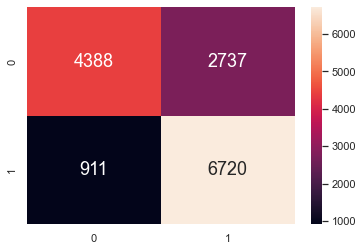

In [53]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5598915989159892

TPR Test :	 0.6847265221878225
TNR Test :	 0.4218036529680365

FPR Test :	 0.5781963470319634
FNR Test :	 0.3152734778121775


<AxesSubplot:>

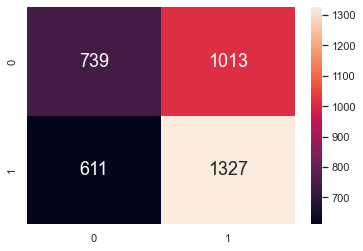

In [54]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


# Analysis

Based on the reported classfication accuracy values for both the train and test set, it can be observed that the model's accuracy on the train and test set has improved based on the optimised values of n_estimators and max_depth. However, the accuracy of the train set is much higher than that of the test set, which proves that the model fails to generalize to the test data. This phenomenon is referred to as 'overfitting'. 

# Model 8: Regularised Random Forest with optimised hyperparameters

# Regularisation: Pre-pruning to reduce 'Overfitting' (NEW)

The pre-pruning technique refers to the early stopping of the growth of the Random Forest. The pre-pruning technique involves tuning the hyperparameters of the Random Forest model prior to the training pipeline. The hyperparameters of the Random Forest including min_samples_leaf, min_samples_split can be tuned to early stop the growth of the tree and prevent the model from overfitting by controlling the complexity of the model.

In [170]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'min_samples_split': np.arange(0.01, 0.05, 0.01),
             'min_samples_leaf': np.arange(0.01, 0.05, 0.01)}             

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(n_estimators = 900, max_depth = 10),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'roc_auc', verbose =10)       # score to evaluate

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Train the models using Cross-Validation
hpGrid.fit(x_train, y_train.popularity.ravel())

print("Param for GS", hpGrid.best_params_)
print("CV score for GS", hpGrid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START min_samples_leaf=0.01, min_samples_split=0.01..............
[CV 1/5; 1/16] END min_samples_leaf=0.01, min_samples_split=0.01;, score=0.571 total time=   7.6s
[CV 2/5; 1/16] START min_samples_leaf=0.01, min_samples_split=0.01..............
[CV 2/5; 1/16] END min_samples_leaf=0.01, min_samples_split=0.01;, score=0.563 total time=   7.6s
[CV 3/5; 1/16] START min_samples_leaf=0.01, min_samples_split=0.01..............
[CV 3/5; 1/16] END min_samples_leaf=0.01, min_samples_split=0.01;, score=0.578 total time=   7.7s
[CV 4/5; 1/16] START min_samples_leaf=0.01, min_samples_split=0.01..............
[CV 4/5; 1/16] END min_samples_leaf=0.01, min_samples_split=0.01;, score=0.578 total time=   7.7s
[CV 5/5; 1/16] START min_samples_leaf=0.01, min_samples_split=0.01..............
[CV 5/5; 1/16] END min_samples_leaf=0.01, min_samples_split=0.01;, score=0.572 total time=   7.8s
[CV 1/5; 2/16] START min_samples_leaf=0.01, 

[CV 1/5; 10/16] END min_samples_leaf=0.03, min_samples_split=0.02;, score=0.566 total time=   5.4s
[CV 2/5; 10/16] START min_samples_leaf=0.03, min_samples_split=0.02.............
[CV 2/5; 10/16] END min_samples_leaf=0.03, min_samples_split=0.02;, score=0.559 total time=   5.6s
[CV 3/5; 10/16] START min_samples_leaf=0.03, min_samples_split=0.02.............
[CV 3/5; 10/16] END min_samples_leaf=0.03, min_samples_split=0.02;, score=0.573 total time=   5.6s
[CV 4/5; 10/16] START min_samples_leaf=0.03, min_samples_split=0.02.............
[CV 4/5; 10/16] END min_samples_leaf=0.03, min_samples_split=0.02;, score=0.571 total time=   5.6s
[CV 5/5; 10/16] START min_samples_leaf=0.03, min_samples_split=0.02.............
[CV 5/5; 10/16] END min_samples_leaf=0.03, min_samples_split=0.02;, score=0.565 total time=   5.6s
[CV 1/5; 11/16] START min_samples_leaf=0.03, min_samples_split=0.03.............
[CV 1/5; 11/16] END min_samples_leaf=0.03, min_samples_split=0.03;, score=0.565 total time=   5.5s
[

In [172]:
from sklearn.metrics import roc_auc_score
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train.popularity.ravel(), hpGrid.predict(x_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test.popularity.ravel(), hpGrid.predict(x_test)))

Test AUC ROC Score for GS:  0.5859314750850153
Test AUC ROC Score for GS:  0.5669622562393148


## Significance of ROC_AUC score

AUC-ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. 

By computing the AUC ROC on train set, we can assess if the model is confident in its learning or not. From above, we can observe that the model is only slightly confident in distinguishing the classes as seen from its score of about 0.585. 

Next, we computed the AUC ROC on test set, as it is the set of data that we can use to estimate generalised performance.

If we were to take the analysis a step further by comparing both the AUC ROC score on train set and test set, we can observe the difference between the train and test scores has vastly decreased, which shows that the 'overfitting' has been reduced via pre-pruning.

## Using the best min_samples_leaf =0.01 and min_samples_split=0.01 parameters found with pre-pruning and GridSearch (max_depth=10, n_estimators =900 in this case)

In [62]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 900,  
                                 max_depth = 10, min_samples_leaf = 0.01, min_samples_split = 0.01)

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.popularity.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=0.01,
                       min_samples_split=0.01, n_estimators=900)

Train Data
Accuracy  :	 0.5939278937381404

TPR Train :	 0.7102607784038789
TNR Train :	 0.4693333333333333

FPR Train :	 0.5306666666666666
FNR Train :	 0.2897392215961211


<AxesSubplot:>

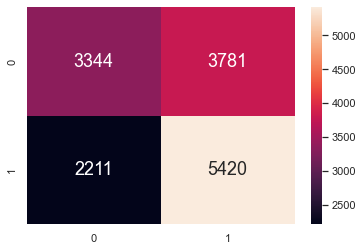

In [63]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.5509485094850949

TPR Test :	 0.6687306501547987
TNR Test :	 0.420662100456621

FPR Test :	 0.579337899543379
FNR Test :	 0.33126934984520123


<AxesSubplot:>

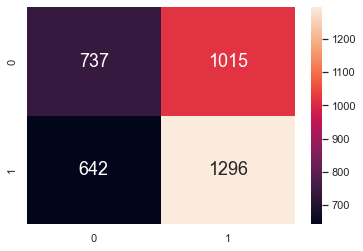

In [64]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


# Analysis
Regularisation aims to reduce the difference between train and test classification accuracy by improving test classification accuracy.

With pre-pruning, classification accuracy for test remained relatively the same, while that for train set decreased greatly. We managed to reduce the gap between train and test accuracy, but we failed to regularise as the test classification accuracy did not improve. 

The lack of improvement in test classification accuracy might be due to the unrelated nature of our dataset (between popularity and audio features).

# Model 9: Logistic Regression Classification (NEW)

### Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

### We decided to use Logistic Regression as it is a classifier model with regularisation applied by default 

In [43]:
# Import essential models and functions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [44]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(variables, popularity_cat, test_size = 0.2, random_state=42)

# Logistic Regression using Train Data
logreg = LogisticRegression(max_iter = 1000)        
logreg.fit(x_train, y_train.popularity.ravel())

# Coefficients of the Logistic Regression line
print('Intercept of Regression \t: b = ', logreg.intercept_)
print('Coefficients of Regression \t: a = ', logreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

Intercept of Regression 	: b =  [0.95378352]
Coefficients of Regression 	: a =  [[ 2.08661990e-01 -1.19283544e+00  6.58698072e-02  2.58757430e-01
  -3.87748989e-01 -1.67101079e-01 -2.51212749e-01  3.97788234e-02
   6.22286218e-04  1.03795613e-02  7.77071439e-04 -8.27670678e-02
   8.98239606e-02]]

          Predictors  Coefficients
0       danceability      0.208662
1             energy     -1.192835
2           loudness      0.065870
3        speechiness      0.258757
4       acousticness     -0.387749
5   instrumentalness     -0.167101
6           liveness     -0.251213
7            valence      0.039779
8              tempo      0.000622
9           duration      0.010380
10               key      0.000777
11              mode     -0.082767
12    time_signature      0.089824



Train Data
Accuracy  :	 0.5602466793168881

TPR Train :	 0.7085572008911021
TNR Train :	 0.4014035087719298

FPR Train :	 0.5985964912280701
FNR Train :	 0.2914427991088979


<AxesSubplot:>

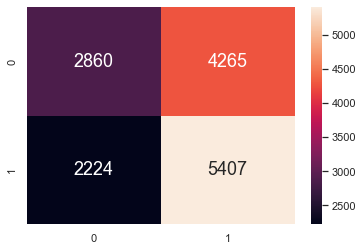

In [45]:
# Check the Goodness of Fit (on Train Data)
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", logreg.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5449864498644986

TPR Test :	 0.6878224974200207
TNR Test :	 0.386986301369863

FPR Test :	 0.613013698630137
FNR Test :	 0.31217750257997934


<AxesSubplot:>

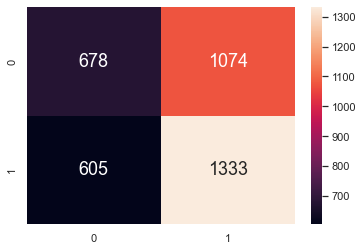

In [42]:
# Check the Goodness of Fit (on Test Data)
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", logreg.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Analysis

We can see that the Logistic Regression model performed similarly to Model 8, with no 'overfitting'. However, Model 8 has slightly higher train and test classification accuracy than this Logistic Regression model.

# Conclusion about this entire project

We started off investigating the individual correlations between audio features and popularity. The resultant low correlation across the board made it obvious that our question could not use a regression model (linear and multivariate).

Hence, we decided to approach from a different angle, it could perhaps be a classification problem. We went with decision trees and logistic regression. 

**Single decision tree vs Random Forest**

The nature of the Random Forest model chooses features randomly during the training process while the decision tree rely on feature importance during the training process. Therefore, from the improvement in accuracy shown for Random Forest model as compared to the decision tree model, it can be proven that the Random Forest model is a much better model because it can generalize over the data in a better way.

**Random Forest vs Random Forest - Gridsearch (with optimal n_estimators and max_depth)**

For our first Random Forest Model, we inputted in common parameters that are being used in the data science industry. For example, there were multiple sources which suggested max_depth = 5/10 is a good value to get a model in general. 

However, we feel that while the model performs well on the train set, it was not effective as shown on the test set. Therefore, we decided to tune the hyperparameters of the model using gridsearch. When using gridsearch, with the use K-fold cross-validation of 5, we managed to conclude that the optimal parameters were n_estimators = 900, max_depth = 10. 

After which, the model with the optimised parameters showed that both classification accuracy on train and test sets improved. However, the difference between both train and test's accuracy may indicate 'overfitting'. 

Thus, we have concluded that regularization must be done to reduce 'overfitting' on our model. Regularization was then carried out in the form of pre-pruning. 

**Random Forest - Gridsearch vs Random Forest - Gridsearch (pre-pruning - find optimal min_leaf and min_sample)**
The optimised Random Forest with pre-pruning is much better than other variants of Random Forest model in terms of reducing the extent of 'overfitting'. That said, regularisation could be observed to be a failed attempt because though 'overfitting' was being reduced, there is negligible improvement on the classification accuracy on the test set.

Therefore, the root cause of the problem might be the due to the lack of relationship between the audio features and popularity variable in our dataset.

**Logistic Regression**
As observed above, the accuracy of Logistic Regression model on the test set is comparable to the Random Forest model (non-optimised) and the various Random Forest model (with varying levels of optimisation). 

However, one defining difference between the former model and the various Random Forest model is that the former performs significantly better in the area of reducing 'overfitting'. 

According to literature review, in general, logistic regression model could perform better when the number of noise variables is less than or equal to the number of predictor variables when compared to the Random Forest model. 

https://scholar.smu.edu/cgi/viewcontent.cgi?article=1041&context=datasciencereview#:~:text=In%20general%2C%20logistic%20regression%20performs,variables%20increases%20in%20a%20dataset.

# Our thoughts

Reflecting on the results of our project, we believe that our results corresponds with the reality of the situation in the music industry. 

Music is a very subjective topic, each individual has their own taste when it comes to which music they like. In fact, this is the reason why there are so many genres within music, i.e. Jazz, Pop, Rap, Country. Furthermore, preferences do change overtime based on the population demographic, making the potential popularity of a song even more random.

If there ever was a perfect formula of audio features for hit songs, it would have long since been discovered and replicated throughout the industry. Unfortunately, that is not the case. New and original songs will continue to be created and previously top hits will slowly fade into the background. That is the beauty of music.

Furthermore, we hypothesise that there could be involvement of external factors that could possibly affect the song's popularity. Some of it could be marketing, funding to exploit the spotify popularity algorithm. 

With that said, our group does wonder whether we could have found some relationship between popularity of songs and audio features within the same genre. Our current data set involved songs from 2000 to 2020 from all kinds of genres, and that could have contributed to the lack of ability to predict popularity.

In hindsight, we could have also used more complicated machine learning models such as deep learning neural networks to yield a better result. 